# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This is an Exploratory Data Analysis (EDA) Project on the Global Terrorism Dataset (GTD). The GTD is an event-level database containing 181,691 records of terrorist attacks that took place around the world from 1970 to 2017. 

This dataset has a wide range of information, however, for this project, data has been analyzed on the basis of countries attacked, number of terrorist attacks over the years, weapons used, gangs involved, types of attacks, attack targets, suicide attacks and intention of attacks.

#### EDA Processes
##### Loading the dataset and first view
The first step was loading the dataset and checking its shape, i.e. the number of rows and columns and the data types or information of all variables.

##### Data Cleaning
This was the most important step and crucial step for this project. Here, as a first step, duplicate rows were identified. Then, missing values were identified. All columns which had more than 10% values missing were removed as this would lead to bias in our analysis. Out of the remaining, only those variables that would be relevant for our analysis were identified and retained. Columns were renamed for ease of understanding and all the null/missing values were filled in with appropriate values. All unique values in each column as well as count of those values were identified and calculated. The final dataset had 181,691 records and 19 features. The Data Cleaning process was done using Python's Pandas library.

##### Data Visualization
A wide range of visualizations have been created for analyzing various categorical and numerical variables. Visualizations include barplots, countplots, piecharts, lineplot, correlation heatmap and pair plot using Python's Matplotlib and Seaborn Data Visualization libraries.

##### Goal
The Goal of this EDA project was to understand the various aspects of terrorist attacks around the globe including countries affected, weapons used, gangs involved, attack types and targets. This information can be used by Goverments and International Organizations to come together and formulate policies to curb these activities and ensure world peace, safety and security. 

##### Challenges
This dataset has lots of missing values which limit analysis in many areas. Moreover, the data covers the period from 1970 to 2017. The current year being 2023, we would need the data for the period from 2018 to 2023 for understanding the current position of global terrorist attacks since many socio-economic-political changes have taken place over the recent years. Having said that, this dataset is still quite useful in providing intriguing insights on global terrorism.


# **GitHub Link -**

https://github.com/AimanSahay/Project-EDA_Global-Terrorism-Dataset

# **Problem Statement**


* How have global terrorism attacks occurred over the years?  
* Which are the major countries where terrorist attacks are highest?  
* Which types of weapons are most commonly used in terrorist attacks?  
* Are there any specific gangs which pose an international terror threat?  
* Which are the most common types of attacks?  
* Who are the main targets of terrorist attacks?  
* How long have terrorist attacks lasted? More than or less than 24 hours.  
* What is the proportion of successful and failed attacks?  
* What is the proportion of suicide and non-suicide attacks and how many of suicide attacks have been succesful?  
* What is the intention or goal of terroist attacks worldwide?

#### **Define Your Business Objective?**

The objective of this project is to understand the various aspects of terrorist attacks around the globe as this information can be used by Goverments and International Organizations to come together and formulate policies to prevent/curb/eliminate terror activities to ensure world peace, safety and security. 

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [237]:
# Libraries installed
# pip install missingno

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

### Dataset Loading

In [238]:
file_path = "C:/Users/aimee/Downloads/Global Terrorism Data.csv"
df = pd.read_csv(file_path, encoding = "ISO-8859-1")

C:\Users\aimee\AppData\Local\Temp/ipykernel_25572/3049966345.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding = "ISO-8859-1")


### Dataset First View

In [239]:
# Dataset First Look
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Dataset Rows & Columns count

In [565]:
# Dataset Rows & Columns count
print(f"Number of Rows: {len(df.axes[0])}")
print(f"Number of Columns: {len(df.axes[1])}")

Number of Rows: 181691
Number of Columns: 135


### Dataset Information

In [241]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


#### Duplicate Values

In [566]:
# Calculate the number of duplicate rows.
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


Note: There are no duplicate rows in this dataset.

#### Missing Values/Null Values

In [243]:
# Calculate the number of missing/null values in each column.
null_sum = df.isnull().sum()
print(null_sum)

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


**Missing Data Visualization - Heatmap**

Text(0.5, 1.0, 'Heatmap of Missing Values in the Dataset')

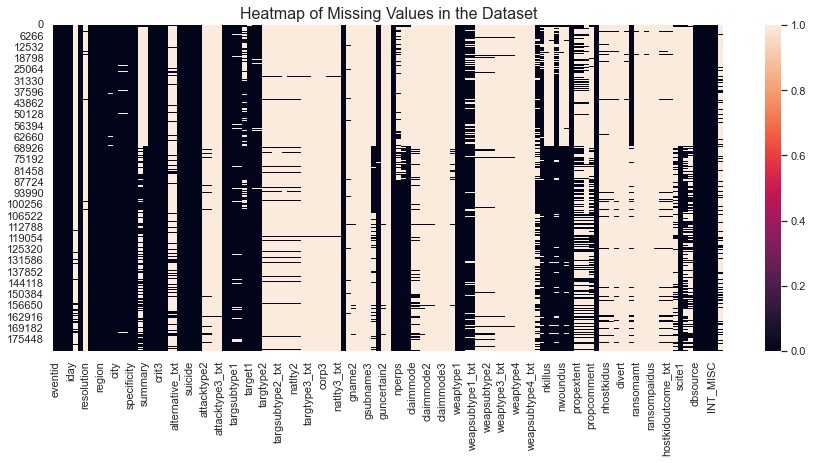

In [568]:
# Heatmap showing the distribution of null values in the entire dataset.
sns.heatmap(df.isnull())
plt.title("Heatmap of Missing Values in the Dataset", fontsize=16)

**Missing Data Visualization - Bar Chart**

Text(0.5, 1.0, 'Bar Plot of Missing Values in the Dataset')

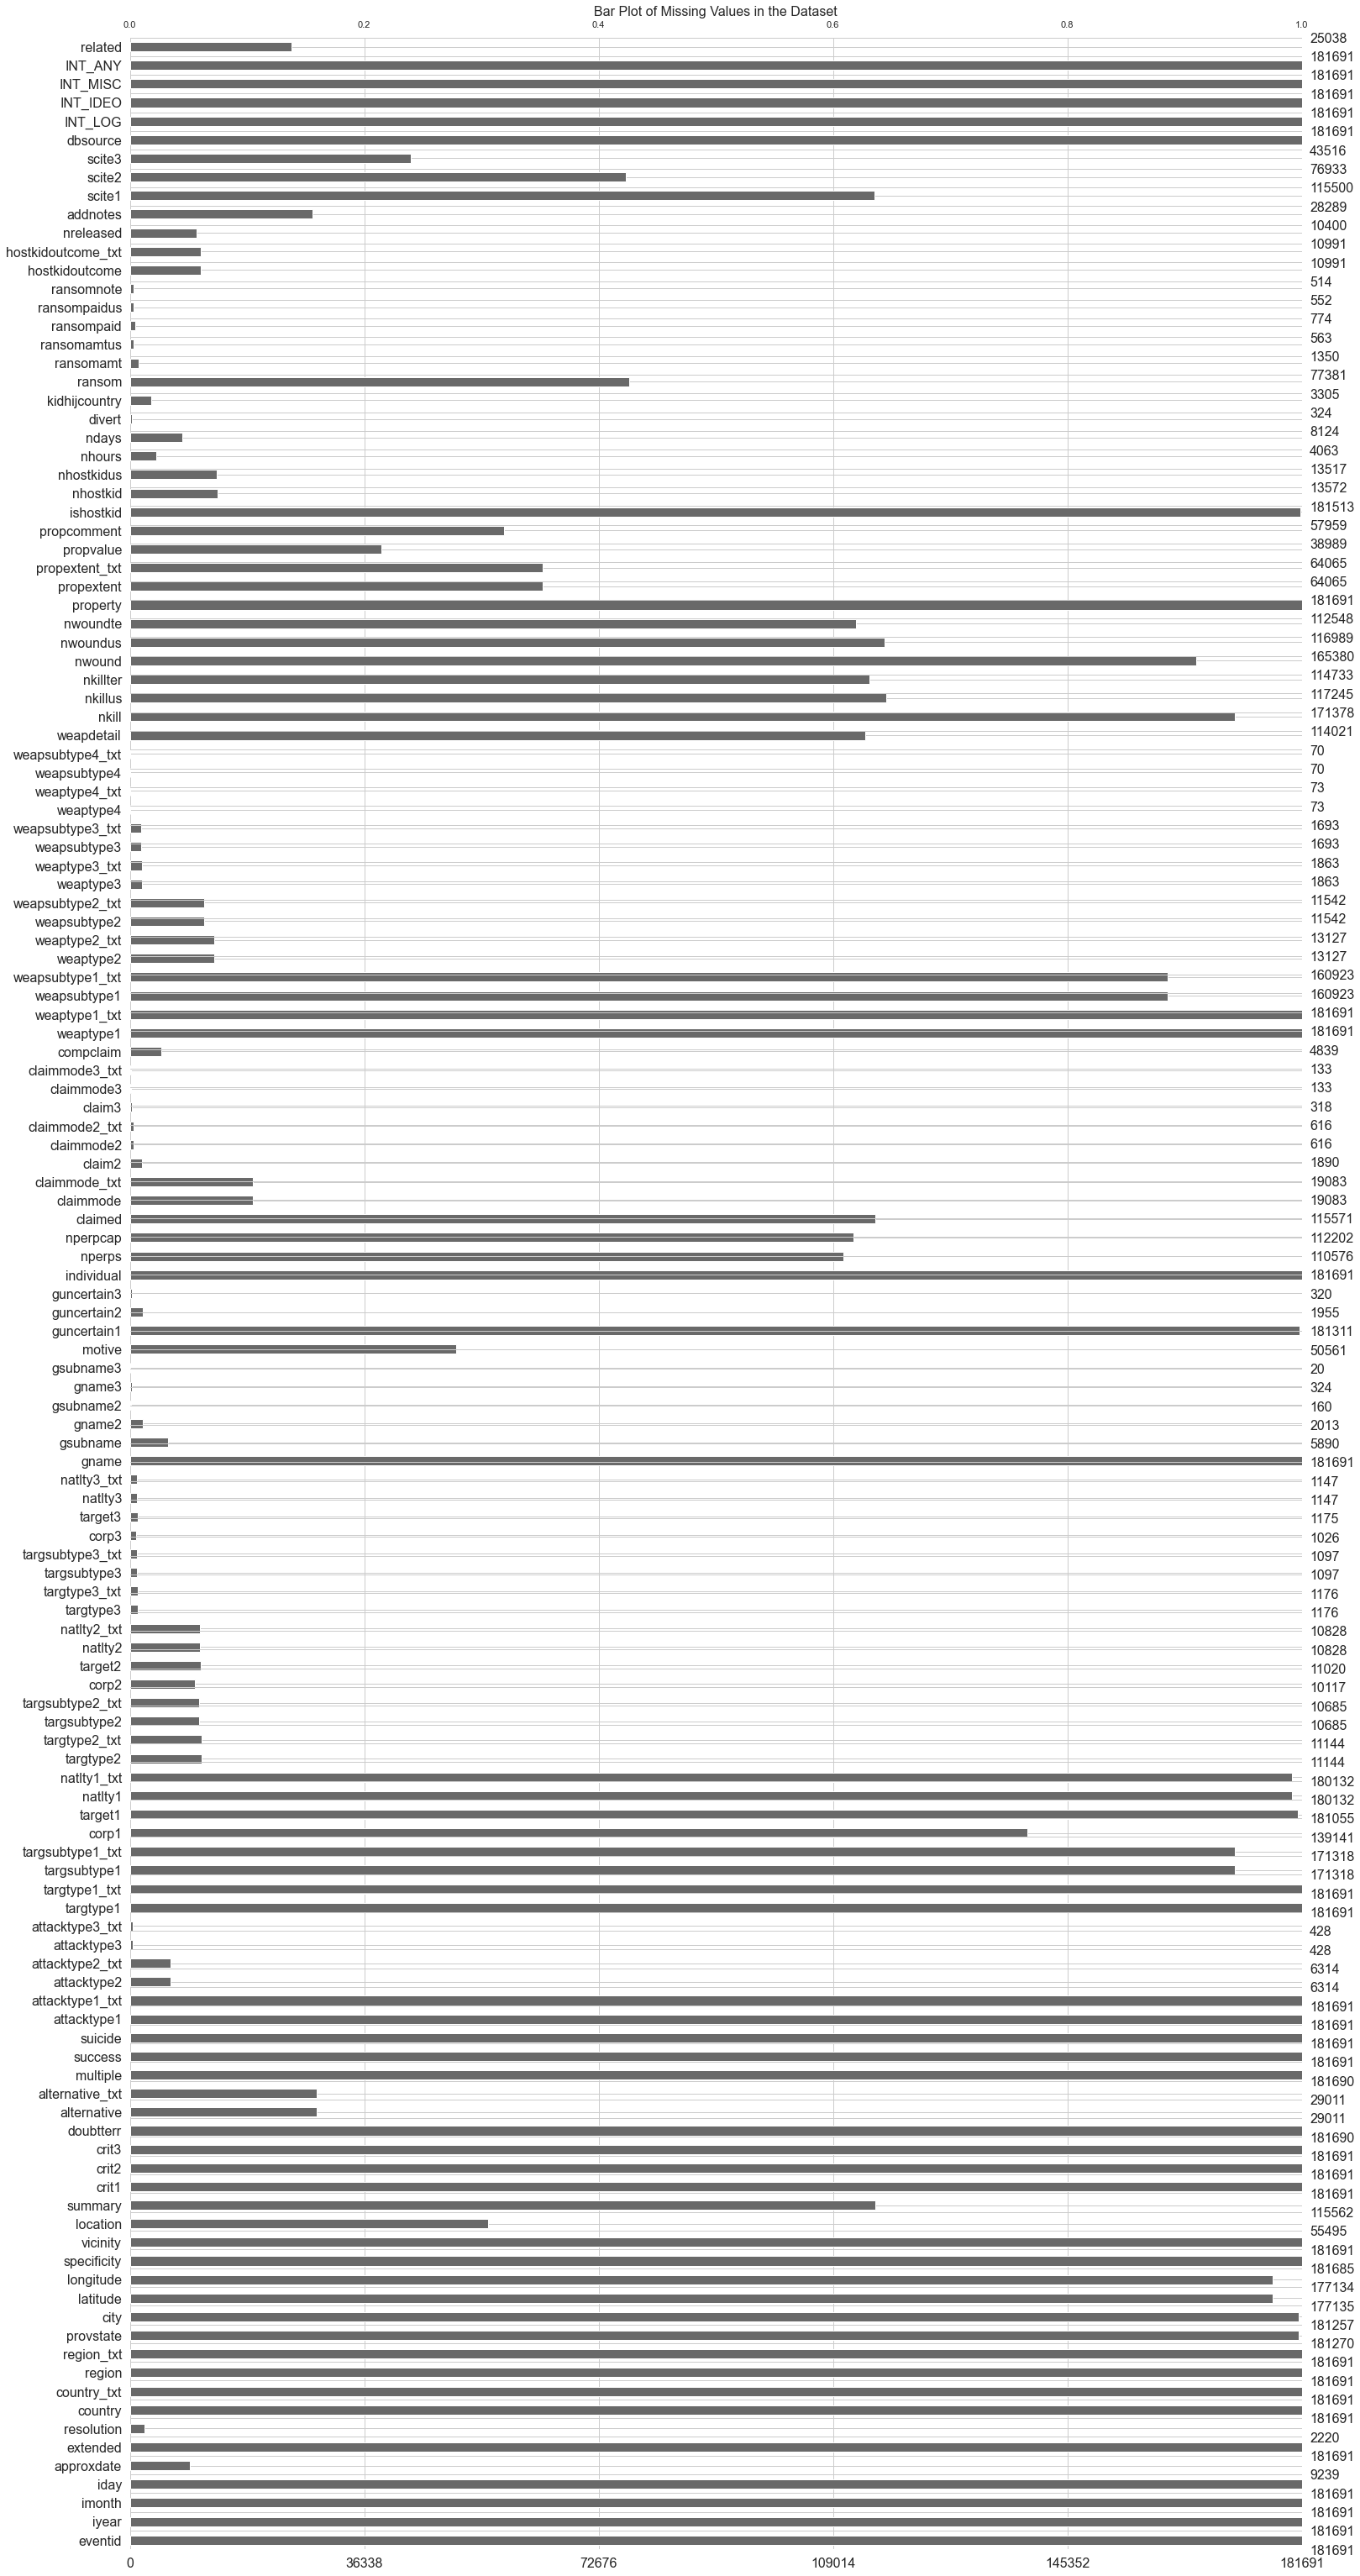

In [569]:
# Visualizing missing values using missingno library

# Bar chart displaying the count of non null values.
msno.bar(df)
plt.title("Bar Plot of Missing Values in the Dataset", fontsize=16)


Note: There seem to be large number of null values in the dataset.

### What did you know about your dataset?

This is the Global Terrorism Dataset. The Global Terrorism Database (GTD) is an open-source database containing information on terrorist attacks around the world from 1970 through 2017.<br>
The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks.  
This dataset contains information on attack types, target types, successful and failed attacks, suicide attacks, countries/regions attacked, terrorist gangs, attack weapons, duration of attacks, intention or goal of attacks.

This dataset has 181,691 rows and 135 columns. There are no duplicate records but the dataset has many missing/null values.

Terrorist attacks are a major concern to any country's government as well as to global orgaizations like United Nations etc.  
The goal is to analyse the dataset to understand the distribution, types, nature of terrorist attacks, weapons used, targets attacked around the world in order for Governments and Global Organizations to gather resources and formulate plans and policies to avoid and stop these attacks in time and contribute to global safety and security.

Source :- The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

## ***2. Understanding Your Variables***

In [246]:
# Dataset Columns
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [247]:
# Dataset Describe
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


### Variables Description

* eventid - A 12-digit Event ID system. First 8 numbers – date recorded “yyyymmdd”. Last 4 numbers – sequential case number for the given day (0001, 0002 etc).
* iyear - This field contains the year in which the incident occurred.
* imonth - This field contains the number of the month in which the incident occurred.
* iday - This field contains the numeric day of the month on which the incident occurred.
* approxdate - Whenever the exact date of the incident is not known or remains unclear, this field is used to record the approximate date of the incident.
* extended - 1 = "Yes" The duration of an incident extended more than 24 hours. 0 = "No" The duration of an incident extended less than 24 hours.
* resolution - This field only applies if "extended" = 1 and records the date in which the incident was resolved.
* country - This field identifies the country code
* country_txt - This field identifies the country or location where the incident occurred.
* region - This field identifies the region code based on 12 regions
* region_txt - This field identifies the region in which the incident occurred.
* provstate - Name (at the time of event) of the 1st order subnational administrative region
* city - Name of the city, village, or town in which the incident occurred
* latitude - The latitude of the city in which the event occurred.
* longitude - The longitude of the city in which the event occurred.
* specificity - This field identifies the geospatial resolution of the latitude and longitude fields.
* vicinity - 1 = "Yes" The incident occurred in the immediate vicinity of the city in question. 0 = "No" The incident in the city itself.
* location - Additional information about the location.
* summary - A brief narrative summary of the incident, noting the "when, where, who, what, how, and why". Only available with incidents occurring after 1997.
* crit1 - Inclusion criteria met or not. 1="Yes", 0="No". Inclusion criteria: POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL
* crit2 - Inclusion criteria met or not. 1="Yes", 0="No". Inclusion criteria: INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S)
* crit3 - Inclusion criteria met or not. 1="Yes", 0="No". Inclusion criteria: OUTSIDE INTERNATIONAL HUMANITARIAN LAW
* doubtterr - Doubt Terrorism Proper? 1=doubt as to whether the incident is an act of terrorism. 0=no doubt. Only available with incidents occurring after 1997.
* alternative - This variable applies to only those cases coded as “Yes” for “Doubt Terrorism Proper?” This variable identifies the most likely categorization of the incident other than terrorism. Only available with incidents occurring after 1997.
* alternative_txt - Similar to "alternative" variable.
* multiple - 1 = "Yes" The attack is part of a multiple incident. 0 = The attack is not part of a multiple incident.
* success - Success of a terrorist strike. 1 = "Yes" The incident was successful. 0 = "No" The incident was not successful.
* suicide - 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide attack.
* attacktype1 - The general method of attack. Uses 9 categories of attack.
* attacktype1_txt - The general method of attack and broad class of tactics used.
* attacktype2 - Uses the same attack hierarchy as attacktype1.
* attacktype2_txt - Same attack type definitions as attacktype1_txt.
* attacktype3 - Uses the same attack hierarchy as attacktype1.
* attacktype3_txt - Same attack type definitions as attacktype1_txt.
* targtype1 - The general type of target/victim.
* targtype1_txt - The general type of target/victim.
* targsubtype1 - Captures the more specific target category and provides the next level of designation for each target type.
* targsubtype1_txt - Captures the more specific target category and provides the next level of designation for each target type 
* corp1 - This is the name of the corporate entity or government agency that was targeted.
* target1 - The specific person, building, installation that was targeted and/or victimized.
* natlty1 - The nationality of the target that was attacked.
* natlty1_txt - The nationality of the target that was attacked.
* targtype2 - Conventions follow “Target/Victim Type” field.
* targtype2_txt - Conventions follow “Target/Victim Type” field.
* targsubtype2 - Conventions follow “Target/Victim Subtype” field.
* targsubtype2_txt - Conventions follow “Target/Victim Subtype” field.
* corp2 - Conventions follow “Name of Entity” field.
* target2 - Conventions follow “Specific Target/Victim” field.
* natlty2 - Conventions follow “Nationality of Target” field. 
* natlty2_txt - Conventions follow “Nationality of Target” field. 
* targtype3 - Conventions follow “Target/Victim Type” field.
* targtype3_txt - Conventions follow “Target/Victim Type” field.
* targsubtype3 - Conventions follow “Target/Victim Subtype” field.
* targsubtype3_txt - Conventions follow “Target/Victim Subtype” field.
* corp3 - Conventions follow “Name of Entity” field.
* target3 - Conventions follow “Name of Entity” field.
* natlty3 - Conventions follow “Nationality of Target/Victim” field.
* natlty3_txt - Conventions follow “Nationality of Target/Victim” field.
* gname - The name of the group that carried out the attack
* gsubname - additional details about group that carried out the attack like factions
* gname2 - This field is used to record the name of the second perpetrator.
* gsubname2 - This field is used to record additional qualifiers or details about the second perpetrator group name. 
* gname3 - This field is used to record the name of the third perpetrator.
* gsubname3 - This field is used to record additional qualifiers of details about the third perpetrator group name.
* motive - When reports explicitly mention a specific motive for the attack, this motive is recorded in the “Motive” field.
* guncertain1 - 1 = "Yes" The perpetrator attribution(s) for the incident are suspected. 0 = "No" The perpetrator attribution(s) for the incident are not suspected.
* guncertain2 - Conventions follow “First Perpetrator Group Suspected/Unconfirmed?”
* guncertain3 - Conventions follow “First Perpetrator Group Suspected/Unconfirmed?”
* individual - This variable indicates whether or not the attack was carried out by an individual or several individuals not known to be affiliated with a group or organization. 
* nperps - The total number of terrorists participating in the incident
* nperpcap - This field records the number of perpetrators taken into custody. Only  available with incidents occurring after 1997.
* claimed - 1 = "Yes" A group or person claimed responsibility for the attack. 0 = "No" No claim of responsibility was made.
* claimmode - This records one of 10 modes used by claimants to claim responsibility.
* claimmode_txt - This records one of 10 modes used by claimants to claim responsibility.
* claim2 - Conventions follow the “Claim of Responsibility” field. 
* claimmode2 - Conventions follow the “Mode for Claim of Responsibility” field. 
* claimmode2_txt - Conventions follow the “Mode for Claim of Responsibility” field. 
* claim3 - Conventions follow the “Claim of Responsibility” field. 
* claimmode3 - Conventions follow the “Mode for Claim of Responsibility” field. 
* claimmode3_txt - Conventions follow the “Mode for Claim of Responsibility” field. 
* compclaim - This field is used to indicate whether more than one group claimed separate responsibility for the attack.
* weaptype1 - Up to four weapon types are recorded for each incident.
* weaptype1_txt - General type of weapon used in the incident
* weapsubtype1 - More specific value for most of the Weapon Types.
* weapsubtype1_txt - More specific value for most of the Weapon Types.
* weaptype2 - Conventions follow “Weapon Type” field.
* weaptype2_txt - Conventions follow “Weapon Type” field.
* weapsubtype2 - Conventions follow “Weapon Sub-Type” field.
* weapsubtype2_txt - Conventions follow “Weapon Sub-Type” field.
* weaptype3 - Conventions follow “Weapon Type” field.
* weaptype3_txt - Conventions follow “Weapon Type” field.
* weapsubtype3 - Conventions follow “Weapon Sub-Type” field.
* weapsubtype3_txt - Conventions follow “Weapon Sub-Type” field.
* weaptype4 - Conventions follow “Weapon Type” field.
* weaptype4_txt - Conventions follow “Weapon Type” field.
* weapsubtype4 - Conventions follow “Weapon Sub-Type” field.
* weapsubtype4_txt - Conventions follow “Weapon Sub-Type” field.
* weapdetail - This field notes any pertinent information on the type of weapon(s) used in the incident.
* nkill - The number of total confirmed fatalities for the incident
* nkillus - The number of U.S. citizens who died as a result of the incident
* nkillter - Limited to only perpetrator fatalities.
* nwound - This field records the number of confirmed non-fatal injuries to both perpetrators and victims. 
* nwoundus - This field records the number of confirmed non-fatal injuries to U.S. citizens, both perpetrators and victims.
* nwoundte - Conventions follow the “Number of Perpetrator Fatalities” field.
* property - 1 = "Yes" The incident resulted in property damage. 0 = "No" The incident did not result in property damage. -9 = "Unknown" It is unknown if the incident resulted in property damage.
* propextent - If “Property Damage?” is “Yes,” then describes extent of property damage.
* propextent_txt - If “Property Damage?” is “Yes,” then describes extent of property damage.
* propvalue - If “Property Damage?” is “Yes,” then the exact U.S. dollar amount (at the time of the incident) of total damages is listed.
* propcomment - If “Property Damage?” is “Yes,” then non-monetary or imprecise measures of damage may be described in this field.
* ishostkid - 1 = "Yes" The victims were taken hostage or kidnapped. 0 = "No" The victims were not taken hostage or kidnapped. -9 = "Unknown" It is unknown if the victims were taken hostage or kidnapped.
* nhostkid - This field records the total number of hostages or kidnapping victims. 
* nhostkidus - This field reports the number of U.S. citizens that were taken hostage or kidnapped.
* nhours - Duration of incident if less than 24 hours in hours.
* ndays - Duration of incident if more than 24 hours in days.
* divert - This field will list the country that hijackers diverted a vehicle to, or the country that the kidnap victims were moved to and held.
* kidhijcountry - This field lists the country in which the incident was resolved or ended.
* ransom - 1 = "Yes" The incident involved a demand of monetary ransom. 0 = "No" The incident did not involve a demand of monetary ransom. -9 = "Unknown" It is unknown if the incident involved a demand of monetary ransom.
* ransomamt - If a ransom was demanded, then the amount (in U.S. dollars) is listed in this field.
* ransomamtus - If a ransom was demanded from U.S. sources, then the amount (in U.S. dollars).
* ransompaid - If a ransom amount was paid, then the amount (in U.S. dollars) is listed in this field.
* ransompaidus - If a ransom amount was paid by U.S. sources, then this figure is listed in U.S. dollars.
* ransomnote - This field is used to record any specific details relating to a ransom.
* hostkidoutcome - This field captures the eventual fate of hostages and kidnap victims.
* hostkidoutcome_txt - This field captures the eventual fate of hostages and kidnap victims.
* nreleased - This field records the number of hostages who survived the incident.
* addnotes - This field is used to capture additional relevant details about the attack. 
* scite1 - This field cites the first source that was used to compile information on the specific incident.
* scite2 - This field cites the second source that was used to compile information on the specific incident.
* scite3 - This field cites the third source that was used to compile information on the specific incident.
* dbsource - This field identifies the original data collection effort in which each event was recorded. 
* INT_LOG - This variable is based on a comparison between the nationality of the perpetrator group and the location of the attack.
* INT_IDEO - This variable is based on a comparison between the nationality of the perpetrator group and the nationality of the target(s)/victim(s).
* INT_MISC - This variable is based on a comparison between the location of the attack and the nationality of the target(s)/victim(s).
* INT_ANY - 1 = "Yes" The attack was international on any of the dimensions described above (logistically, ideologically, miscellaneous) 0 = "No" The attack was domestic on all of the dimensions described above (logistically, ideologically, miscellaneous) -9 = "Unknown" It is unknown if the attack was international or domestic; the value for one or more dimensions is unknown. 
* related - When an attack is part of a coordinated, multi-part incident the GTD IDs of the related incidents are listed here, separated by commas. Only available with incidents occurring after 1997.

### Check Unique Values for each variable.

Note:  
Since this dataset has 135 columns and many columns have a large number of null values, not all columns may be useful for analysis. This step of checking unique values is done at a later stage once only the features useful for our analysis have been filtered out.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

Identify the columns where % of null values is more than 10% and exclude those features. This is important to avoid bias in our analysis.

In [248]:
# Calculate the percentage of null values.
null_percent = (null_sum / len(df)) * 100
null_percent = null_percent.sort_values(ascending = False)

# Identify the columns with null values more than 10%
null_percent_more_than_10 = null_percent[null_percent > 10]

# Print the output
print(null_percent_more_than_10)
print(f"\nNumber of columns with more than 10% missing data: {len(null_percent_more_than_10)}")

gsubname3           99.988992
weapsubtype4_txt    99.961473
weapsubtype4        99.961473
weaptype4           99.959822
weaptype4_txt       99.959822
                      ...    
nwoundus            35.611010
nkillus             35.470111
corp1               23.418882
weapsubtype1        11.430396
weapsubtype1_txt    11.430396
Length: 90, dtype: float64

Number of columns with more than 10% missing data: 90


In [249]:
# Let's drop these columns as we may not need them for our current analysis.

# Create a copy of the original dataset.
df1 = df.copy()

# Check if data is copied correctly
print(df1.info())
print("")
print(df1.shape)

df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None

(181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [250]:
# Make a list of columns to retain.
cols_to_retain = set(df1.columns) - set(null_percent_more_than_10.index)
cols_to_retain = list(cols_to_retain)
len(cols_to_retain)

45

In [251]:
# Include only the columns to be retained in df1.
df1 = df1[cols_to_retain]

In [252]:
# Check the info and shape of the new dataframe.
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   multiple          181690 non-null  float64
 1   natlty1           180132 non-null  float64
 2   targsubtype1      171318 non-null  float64
 3   vicinity          181691 non-null  int64  
 4   INT_MISC          181691 non-null  int64  
 5   crit1             181691 non-null  int64  
 6   extended          181691 non-null  int64  
 7   INT_LOG           181691 non-null  int64  
 8   success           181691 non-null  int64  
 9   weaptype1         181691 non-null  int64  
 10  region_txt        181691 non-null  object 
 11  ishostkid         181513 non-null  float64
 12  natlty1_txt       180132 non-null  object 
 13  nwound            165380 non-null  float64
 14  imonth            181691 non-null  int64  
 15  country           181691 non-null  int64  
 16  target1           18

(181691, 45)

In [253]:
# From the above list, select only those columns that will be useful in our analysis.
cols_reqd = ['iyear','imonth','iday','country_txt','region_txt','provstate','city','attacktype1_txt','targtype1_txt',
            'targsubtype1_txt','gname','weaptype1_txt', 'extended', 'success', 'crit1', 'crit2', 'crit3', 'property', 'suicide']
print(len(cols_reqd))

19


In [254]:
# Create a new dataframe with only those columns that will be used in our analysis as listed above.
terrorism_df = df1[cols_reqd]

In [255]:
# Check the information and shape of the filtered dataframe.
terrorism_df.info()
terrorism_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   iyear             181691 non-null  int64 
 1   imonth            181691 non-null  int64 
 2   iday              181691 non-null  int64 
 3   country_txt       181691 non-null  object
 4   region_txt        181691 non-null  object
 5   provstate         181270 non-null  object
 6   city              181257 non-null  object
 7   attacktype1_txt   181691 non-null  object
 8   targtype1_txt     181691 non-null  object
 9   targsubtype1_txt  171318 non-null  object
 10  gname             181691 non-null  object
 11  weaptype1_txt     181691 non-null  object
 12  extended          181691 non-null  int64 
 13  success           181691 non-null  int64 
 14  crit1             181691 non-null  int64 
 15  crit2             181691 non-null  int64 
 16  crit3             181691 non-null  int

(181691, 19)

In [256]:
# Check for null values in the terrorism_df
terrorism_df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
provstate             421
city                  434
attacktype1_txt         0
targtype1_txt           0
targsubtype1_txt    10373
gname                   0
weaptype1_txt           0
extended                0
success                 0
crit1                   0
crit2                   0
crit3                   0
property                0
suicide                 0
dtype: int64

In [257]:
# Since there are still some null values in a few columns, we can fill those with appropriate values.

# For the "provstate" and "city" columns, we can fill null values as "Unknown" as this data is not available.
terrorism_df["provstate"] = terrorism_df["provstate"].fillna("Unknown")
terrorism_df["city"] = terrorism_df["city"].fillna("Unknown")

# For the "targsubtype1_txt" column, we can fill this as Not Applicable as specified in START documentation.
# The START documention states the following for "targsubtype1_txt" variable:
# 'If a target subtype is not applicable this variable is left blank.'
terrorism_df["targsubtype1_txt"] = terrorism_df["targsubtype1_txt"].fillna("Not_Applicable")

C:\Users\aimee\AppData\Local\Temp/ipykernel_25572/2876273273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrorism_df["provstate"] = terrorism_df["provstate"].fillna("Unknown")
C:\Users\aimee\AppData\Local\Temp/ipykernel_25572/2876273273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrorism_df["city"] = terrorism_df["city"].fillna("Unknown")
C:\Users\aimee\AppData\Local\Temp/ipykernel_25572/2876273273.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [258]:
# Check if missing data is filled in properly.
terrorism_df.isnull().sum()

# As can be seen there are no more null values in our selected dataset.

iyear               0
imonth              0
iday                0
country_txt         0
region_txt          0
provstate           0
city                0
attacktype1_txt     0
targtype1_txt       0
targsubtype1_txt    0
gname               0
weaptype1_txt       0
extended            0
success             0
crit1               0
crit2               0
crit3               0
property            0
suicide             0
dtype: int64

Note: This dataset now has no missing/null values. 

In [260]:
# Change the weapon 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)' in "weaptype1_txt" to 'Vehicle' for simplicity.
terrorism_df.replace({"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)" : "Vehicle"}, inplace=True)

C:\Users\aimee\AppData\Local\Temp/ipykernel_25572/2937190014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrorism_df.replace({"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)" : "Vehicle"}, inplace=True)


In [262]:
# Check if the value is replaced correctly.
terrorism_df.weaptype1_txt.unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment', 'Vehicle', 'Fake Weapons',
       'Radiological', 'Other', 'Biological'], dtype=object)

In [263]:
# Rename the columns which will be used in our analysis.
terrorism_df = terrorism_df.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                                              'region_txt':'Region','provstate':'State','city':'City',
                                              'attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                                            'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type',
                                             'extended':'Duration','success':'Success','crit1':'Criterion_1','crit2':'Criterion_2',
                                              'crit3':'Criterion_3','property':'Property_damage', 'suicide':'Suicide_attack'})

In [264]:
# Check if the columns are renamed correctly.
print(terrorism_df.columns)
print(f"\nFinal number of columns in the dataset to be used for further analysis: {len(terrorism_df.columns)}")

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type', 'Duration', 'Success', 'Criterion_1', 'Criterion_2',
       'Criterion_3', 'Property_damage', 'Suicide_attack'],
      dtype='object')

Final number of columns in the dataset to be used for further analysis: 19


### Check Unique Values for each variable.

In [265]:
# Check unique values in each of the 19 columns.

print(f"Year: {terrorism_df['Year'].unique()}")
print(f"\nMonth: {terrorism_df['Month'].unique()}")
print(f"\nDay: {terrorism_df['Day'].unique()}")
print(f"\nCountry: {terrorism_df['Country'].unique()}")
print(f"\nRegion: {terrorism_df['Region'].unique()}")
print(f"\nState: {terrorism_df['State'].unique()}")
print(f"\nCity: {terrorism_df['City'].unique()}")
print(f"\nAttack_type: {terrorism_df['Attack_type'].unique()}")
print(f"\nTarget_type: {terrorism_df['Target_type'].unique()}")
print(f"\nTarget_subtype: {terrorism_df['Target_subtype'].unique()}")
print(f"\nGang_name: {terrorism_df['Gang_name'].unique()}")
print(f"\nWeapon_type: {terrorism_df['Weapon_type'].unique()}")
print(f"\nDuration: {terrorism_df['Duration'].unique()}")
print(f"\nSuccess: {terrorism_df['Success'].unique()}")
print(f"\nCriterion_1: {terrorism_df['Criterion_1'].unique()}")
print(f"\nCriterion_2: {terrorism_df['Criterion_2'].unique()}")
print(f"\nCriterion_3: {terrorism_df['Criterion_3'].unique()}")
print(f"\nProperty_damage: {terrorism_df['Property_damage'].unique()}")
print(f"\nSuicide_attack: {terrorism_df['Suicide_attack'].unique()}")

Year: [1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]

Month: [ 7  0  1  2  3  4  5  6  8  9 10 11 12]

Day: [ 2  0  1  3  6  8  9 10 11 12 13 14 15 19 20 21 22 25 26 27 28 30 31  4
  7 16 17 18 23 24  5 29]

Country: ['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'United Kingdom' 'Colombia' 'Bolivia' 'Nicaragua'
 'Netherlands' 'Belgium' 'Canada' 'Australia' 'Pakistan' 'Zambia' 'Sweden'
 'Costa Rica' 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'Kuwait' 'West Bank and Gaza Strip' 'Austria' 'Czechoslovakia' 'India'
 'France' 'South Vietnam' 'Brunei'

In [266]:
# Count the number of unique values of each variable.

print(f"Year: {terrorism_df['Year'].nunique()}")
print(f"\nMonth: {terrorism_df['Month'].nunique()}")
print(f"\nDay: {terrorism_df['Day'].nunique()}")
print(f"\nCountry: {terrorism_df['Country'].nunique()}")
print(f"\nRegion: {terrorism_df['Region'].nunique()}")
print(f"\nState: {terrorism_df['State'].nunique()}")
print(f"\nCity: {terrorism_df['City'].nunique()}")
print(f"\nAttack_type: {terrorism_df['Attack_type'].nunique()}")
print(f"\nTarget_type: {terrorism_df['Target_type'].nunique()}")
print(f"\nTarget_subtype: {terrorism_df['Target_subtype'].nunique()}")
print(f"\nGang_name: {terrorism_df['Gang_name'].nunique()}")
print(f"\nWeapon_type: {terrorism_df['Weapon_type'].nunique()}")
print(f"\nDuration: {terrorism_df['Duration'].nunique()}")
print(f"\nSuccess: {terrorism_df['Success'].nunique()}")
print(f"\nCriterion_1: {terrorism_df['Criterion_1'].nunique()}")
print(f"\nCriterion_2: {terrorism_df['Criterion_2'].nunique()}")
print(f"\nCriterion_3: {terrorism_df['Criterion_3'].nunique()}")
print(f"\nProperty_damage: {terrorism_df['Property_damage'].nunique()}")
print(f"\nSuicide_attack: {terrorism_df['Suicide_attack'].nunique()}")

Year: 47

Month: 13

Day: 32

Country: 205

Region: 12

State: 2855

City: 36674

Attack_type: 9

Target_type: 22

Target_subtype: 113

Gang_name: 3537

Weapon_type: 12

Duration: 2

Success: 2

Criterion_1: 2

Criterion_2: 2

Criterion_3: 2

Property_damage: 3

Suicide_attack: 2


In [267]:
# Check the first 10 rows of our final dataset.
terrorism_df.head(10)

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,Duration,Success,Criterion_1,Criterion_2,Criterion_3,Property_damage,Suicide_attack
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown,0,1,1,1,1,0,0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0,1,1,1,1,0,0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,0,1,1,1,1,0,0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,0,1,1,1,1,1,0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,0,1,1,1,1,1,0
5,1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",Black Nationalists,Firearms,0,1,1,1,1,1,0
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,Assassination,Police,Police Security Forces/Officers,Tupamaros (Uruguay),Firearms,0,0,1,1,1,0,0
7,1970,1,2,United States,North America,California,Oakland,Bombing/Explosion,Utilities,Electricity,Unknown,Explosives,0,1,1,1,1,1,0
8,1970,1,2,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,New Year's Gang,Incendiary,0,1,1,1,1,1,0
9,1970,1,3,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,New Year's Gang,Incendiary,0,1,1,1,1,1,0


In [268]:
# Shape of the updated dataset
terrorism_df.shape

(181691, 19)

##### Note: This is the final updated dataset. We can now proceed with further analysis.

### What all manipulations have you done and insights you found?

* The dataset contained a large number of missing values. 
* First, columns which had more than 10% missing values were identified and removed. This step was important to avoid bias in the analysis. 
* The number of remaining columns were now 45 out of initial 135 columns. Out of these 45, 19 features were identified as useful for analysis and hence these were filtered out and assigned to a new dataframe variable. 
* The columns were renamed. 
* There were still 3 columns with null values. These were filled in with appropriate values taking reference from START documentation (codebook). 
* Also, some values were replaced with appropriate names for simplicity. 
* Finally, all unique values alongwith their count were identified and displayed for all features.

The final cleaned and updated dataset has 181,691 records and 19 features with no duplicate or missing values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [269]:
terrorism_df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type', 'Duration', 'Success', 'Criterion_1', 'Criterion_2',
       'Criterion_3', 'Property_damage', 'Suicide_attack'],
      dtype='object')

#### Chart - 1

In [325]:
# Goal 1: Create a line plot to check the cumulative contribution of top n countries to the global terrorist attacks.

# Prepare the data for visualization
num_attacks = terrorism_df["Country"].value_counts()
num_attacks = pd.DataFrame(num_attacks)
num_attacks.reset_index(inplace = True)
num_attacks.rename(columns={'index':'Country', 'Country':'Number_of_attacks'}, inplace=True)

total_attacks = num_attacks['Number_of_attacks'].sum()
num_attacks['Attack_%'] = (num_attacks['Number_of_attacks'] / total_attacks) * 100
num_attacks['Cumulative_num_attacks'] = num_attacks['Number_of_attacks'].cumsum()
num_attacks['Cum_attack_%'] = (num_attacks['Cumulative_num_attacks'] / total_attacks) * 100
num_attacks

,Country,Number_of_attacks,Attack_%,Cumulative_num_attacks,Cum_attack_%
0,Iraq,24636,13.559285,24636,13.559285
1,Pakistan,14368,7.907932,39004,21.467216
2,Afghanistan,12731,7.006951,51735,28.474168
3,India,11960,6.582605,63695,35.056772
4,Colombia,8306,4.571498,72001,39.628270
...,...,...,...,...,...
200,International,1,0.000550,181687,99.997798
201,Wallis and Futuna,1,0.000550,181688,99.998349
202,South Vietnam,1,0.000550,181689,99.998899
203,Andorra,1,0.000550,181690,99.999450


In [271]:
num_attacks.tail(164)
# Using the 80:20 rule, we can see here that more than 90% of the attacks have been done in the top 41 (20% of 205 countries) countries.
# Let us visualize this.

,Country,Number_of_attacks,Attack_%,Cumulative_num_attacks,Cum_attack_%
41,Kenya,683,0.375913,166884,91.850449
42,Burundi,613,0.337386,167497,92.187835
43,Mali,566,0.311518,168063,92.499353
44,Myanmar,546,0.300510,168609,92.799864
45,West Germany (FRG),541,0.297758,169150,93.097622
...,...,...,...,...,...
200,International,1,0.000550,181687,99.997798
201,Wallis and Futuna,1,0.000550,181688,99.998349
202,South Vietnam,1,0.000550,181689,99.998899
203,Andorra,1,0.000550,181690,99.999450


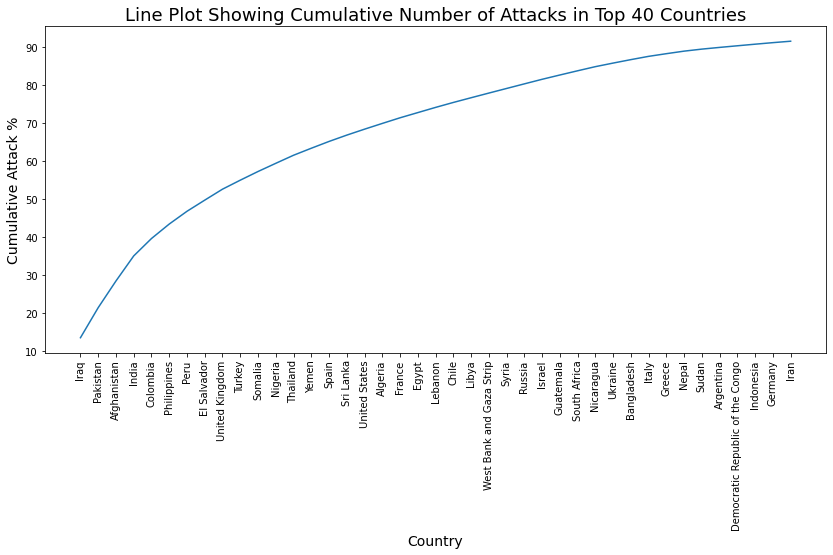

In [272]:
attack_plot_data = num_attacks.head(41)
plt.figure(figsize=(14,6))
sns.lineplot(x="Country", y="Cum_attack_%", data=attack_plot_data)
plt.title("Line Plot Showing Cumulative Number of Attacks in Top 40 Countries", fontsize=18)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Cumulative Attack %", fontsize=14)
plt.xticks(rotation=90)

plt.show()

# As can be seen from the following chart, more than 90% of attacks have occurred only in 40 countries out of 205 countries.
# We can infer that these 40 countries are the most terrorised nations.

C:\Users\aimee\AppData\Local\Temp/ipykernel_25572/4069800591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_plot_data["Attack_%_top_40"] = (attack_plot_data["Number_of_attacks"] / attack_plot_data["Number_of_attacks"].sum())*100


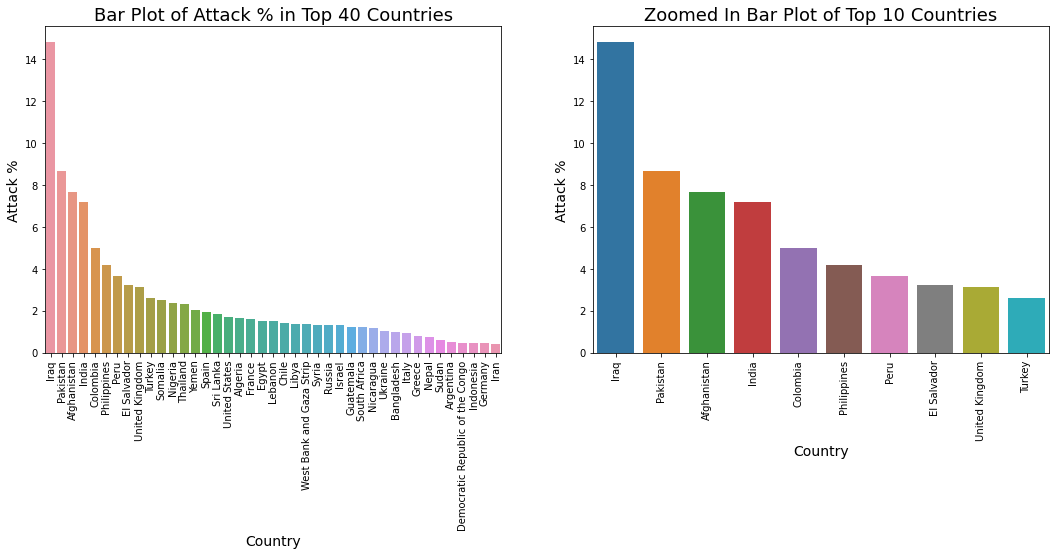

In [273]:
# Goal 2: From the above which countries have individually contributed the most to the global terrorist attacks.

# Add a column to calculate the attack % of each country w.r.t. the top 41 most terrorized nations.
attack_plot_data["Attack_%_top_40"] = (attack_plot_data["Number_of_attacks"] / attack_plot_data["Number_of_attacks"].sum())*100

# Create a barchart to check the contribution of each of the above 41 countries.
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.barplot(x="Country", y="Attack_%_top_40", data=attack_plot_data)
plt.title("Bar Plot of Attack % in Top 40 Countries", fontsize=18)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Attack %", fontsize=14)
plt.xticks(rotation=90)

# Let us zoom in on the top 10 countries
plt.subplot(1,2,2)
top10 = attack_plot_data.head(10)
sns.barplot(x="Country", y="Attack_%_top_40", data=top10)
plt.title("Zoomed In Bar Plot of Top 10 Countries", fontsize=18)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Attack %", fontsize=14)
plt.xticks(rotation=90)

plt.show()


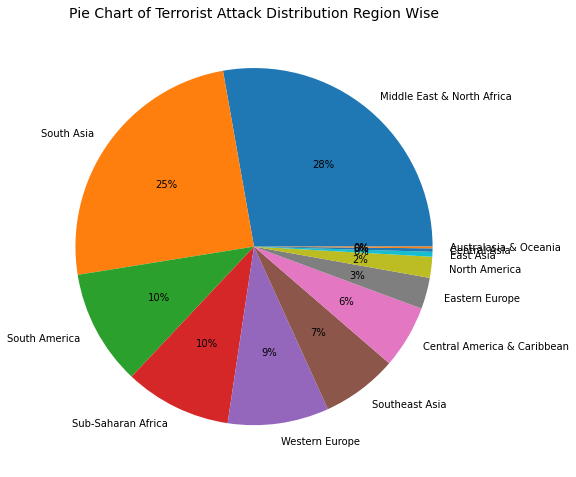

In [151]:
# Analyse the most affected Regions (this result should corroborate the above country attack analysis).
attacks = terrorism_df["Region"].value_counts()

plt.figure(figsize=(8,15))
plt.pie(x=attacks.values, labels=attacks.index, autopct="%.0f%%")
plt.title("Pie Chart of Terrorist Attack Distribution Region Wise", fontsize=14)
plt.show()

Inferences:
1. It is important to note which are most terrorized nations globally. Out of 205 countries, we could narrow down the list of most terrorized nations to 40 using visualizations which also proves the 80:20 rule.
2. The Global Organizations can focus their policy decisions first on these 40 nations.
3. Out of these 40, the top 10 nations are the most prone to terrorism as displayed in the zoomed in plot.
4. These 10 nations hence become the focal point for these organizations while framing policies on global terrorism.
5. The policies can be custom made depending on the extent of terror attacks by bifurcating the top 10 with the remaining 30 nations which can be also be further bifurcated and hence such policies can be applied phase wise to these 40 highly terrorized nations.
6. The pie chart confirms that the regions most affected by terrorist attacks are South Asia and Middle East & North Africa. This result corroborates our analysis of most terrorized nations which are part of these regions.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [274]:
# Chart - 4 visualization code
terrorism_df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type', 'Duration', 'Success', 'Criterion_1', 'Criterion_2',
       'Criterion_3', 'Property_damage', 'Suicide_attack'],
      dtype='object')

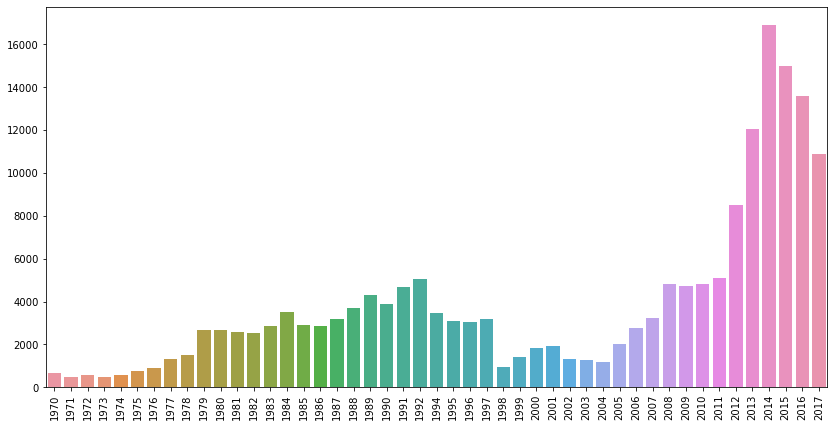

In [275]:
# Let us now analyze the year wise distribution of terrorist attacks.

# Prepare data for plotting
year_plot = terrorism_df["Year"].value_counts()
plt.figure(figsize=(14,7))
sns.barplot(x=year_plot.index, y=year_plot.values)
plt.xticks(rotation=90)
plt.show()

In [276]:
# Years 2013 to 2017 have had the most number of terrorist attacks.
# Let us explore which countries in these years have had the most number of attacks.

top10_countries = top10["Country"].value_counts().index.tolist()
year_2013to2017 = terrorism_df[(terrorism_df["Year"] >= 2013) & (terrorism_df["Country"].isin(top10_countries))]
year_country_plot = year_2013to2017[["Year", "Country"]]

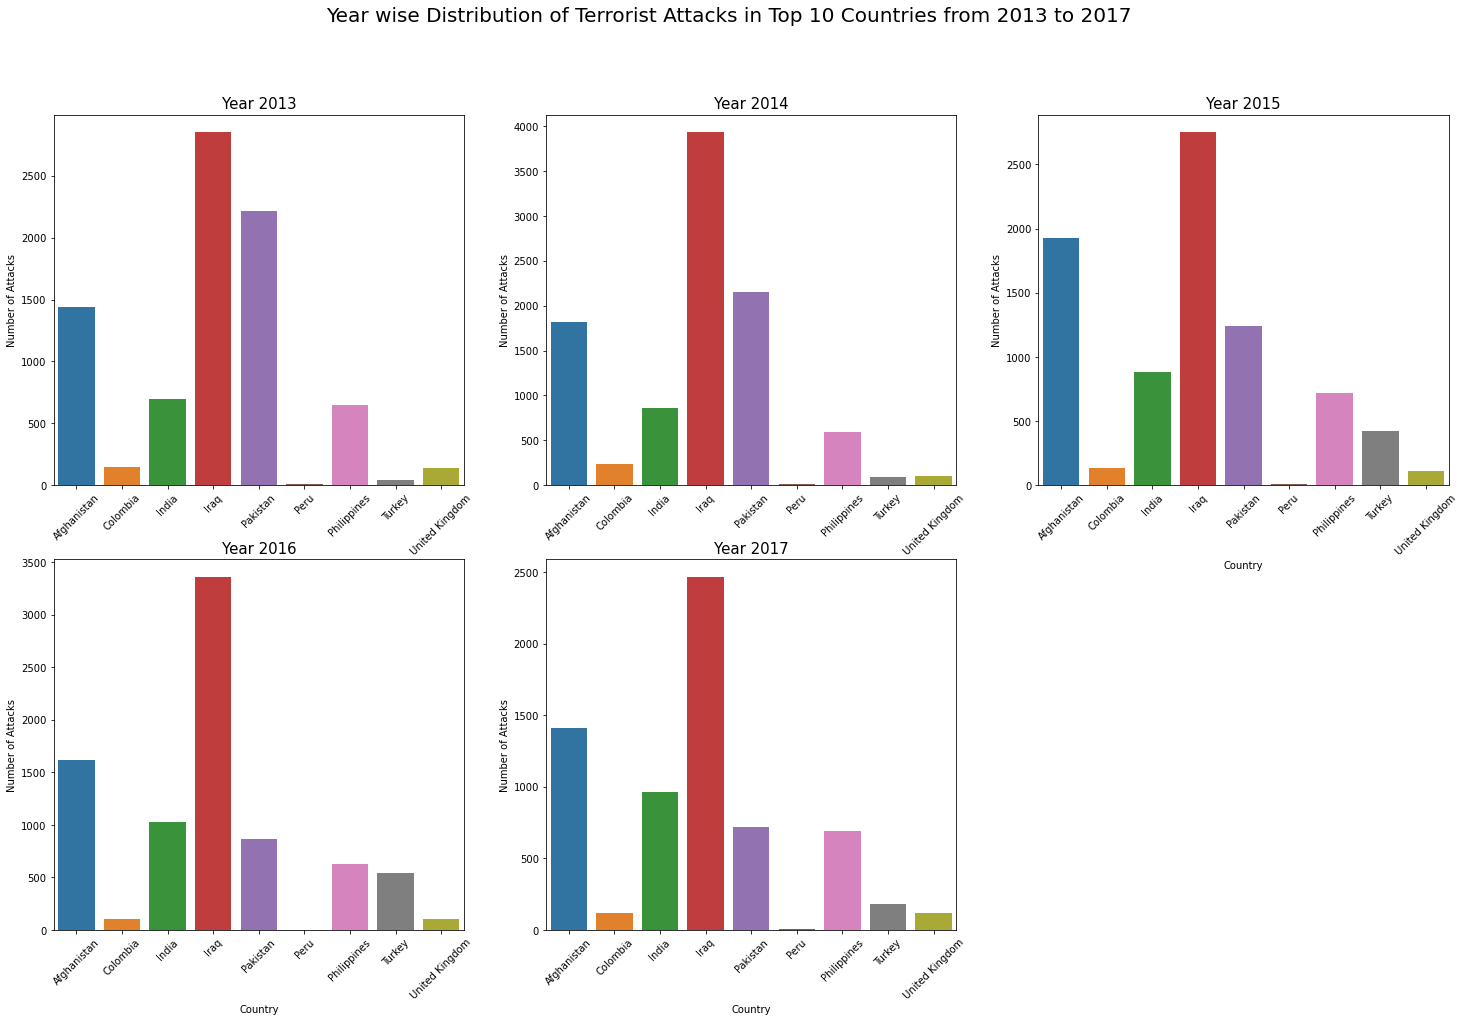

In [277]:
# Make barplots for each year from 2013 to 2017 to show which countries have had he most number of attacks.

year_country_plot = year_2013to2017.groupby(['Year', 'Country'])['Region'].count().reset_index()
year_country_plot = year_country_plot.rename(columns = {"Region":"Num_attacks"})

plt.figure(figsize=(25,15))

plt.suptitle("Year wise Distribution of Terrorist Attacks in Top 10 Countries from 2013 to 2017", fontsize=20)

# Subplot 1: Year 2013
plt.subplot(2,3,1)
year_2013 = year_country_plot[(year_country_plot["Year"] == 2013)]
sns.barplot(x="Country", y="Num_attacks", data=year_2013)
plt.title("Year 2013", fontsize=15)
plt.xlabel("Country")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)

# Subplot 2: Year 2014
plt.subplot(2,3,2)
year_2014 = year_country_plot[(year_country_plot["Year"] == 2014)]
sns.barplot(x="Country", y="Num_attacks", data=year_2014)
plt.title("Year 2014", fontsize=15)
plt.xlabel("Country")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)

# Subplot 3: Year 2015
plt.subplot(2,3,3)
year_2015 = year_country_plot[(year_country_plot["Year"] == 2015)]
sns.barplot(x="Country", y="Num_attacks", data=year_2015)
plt.title("Year 2015", fontsize=15)
plt.xlabel("Country")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)

# Subplot 4: Year 2016
plt.subplot(2,3,4)
year_2016 = year_country_plot[(year_country_plot["Year"] == 2016)]
sns.barplot(x="Country", y="Num_attacks", data=year_2016)
plt.title("Year 2016", fontsize=15)
plt.xlabel("Country")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)

# Subplot 5: Year 2017
plt.subplot(2,3,5)
year_2017 = year_country_plot[(year_country_plot["Year"] == 2017)]
sns.barplot(x="Country", y="Num_attacks", data=year_2017)
plt.title("Year 2017", fontsize=15)
plt.xlabel("Country")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)

plt.show()

Inference:
1. In all the years Iraq has had most number of attacks.
2. In 2013 and 2014 there were more attacks in Pakistan as compared to Afghanistan. However, this trend reversed in the following years where the number of attacks in Afghanistan exceeded those in Pakistan.
3. The difference in the number of attacks in India and Pakistan was significant in years 2013,2014 and 2015. However, after 2015, the number of attacks in India exceeded those in Pakistan.

Objective:
Study of this trend helps to understand when attacks in certain countries have increased as compared to others. Analysing the changes in the socio-political conditions could provide evidence as to why these attacks in respective countries have increased over the years. This will further lead to formulation of anti-terrorism policies and urgency of its implementation for those countries.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [279]:
# Let us now explore weapon details used in the attacks


terrorism_df.Weapon_type.value_counts()

Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
Vehicle                 136
Other                   114
Biological               35
Fake Weapons             33
Radiological             14
Name: Weapon_type, dtype: int64

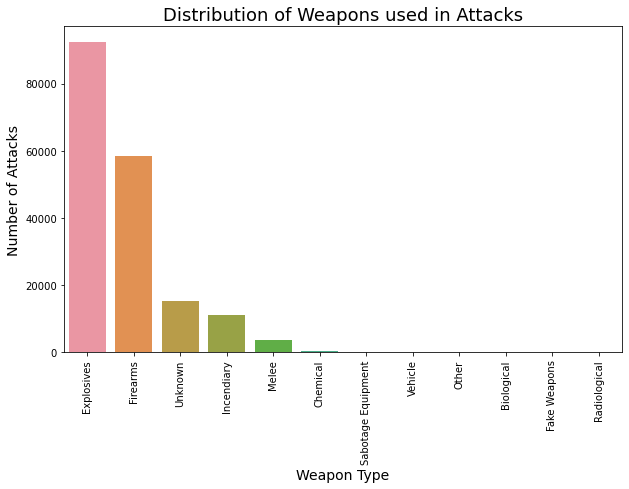

In [293]:
# Barplot showing which are the most used weapons in the attacks.
plt.figure(figsize=(10,6))
sns.countplot(x="Weapon_type", data=terrorism_df, order=terrorism_df["Weapon_type"].value_counts().index)
plt.title("Distribution of Weapons used in Attacks", fontsize=18)
plt.xlabel("Weapon Type", fontsize=14)
plt.ylabel("Number of Attacks", fontsize=14)
plt.xticks(rotation=90)

plt.show()

# Explanation of Unknown and Other:
# Other: A weapon that has been identified but does not fit into one of the defined categories.
# Unknown: The weapon type cannot be determined from the available information.

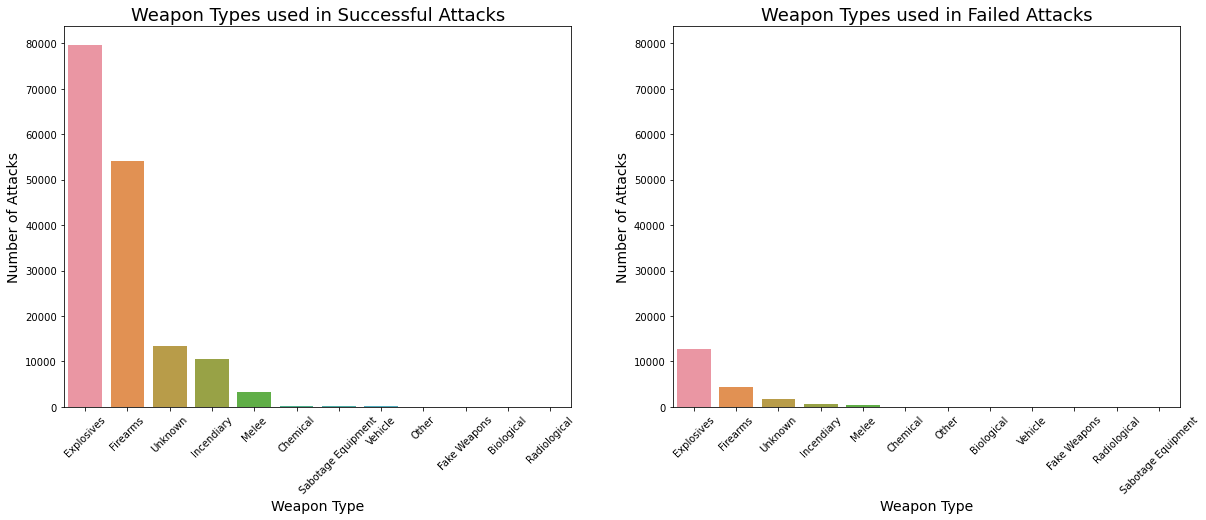

In [390]:
# Prpare the data to make two bar charts showing the success failure rate of weapon attacks.

weapon_success_df = terrorism_df[["Weapon_type", "Success"]]
# weapon_success_df = weapon_success_df.set_index("Weapon_type")
weapon_success_df

# Success (Success=1)
success = weapon_success_df[weapon_success_df["Success"] == 1]
# Failure (Success=0)
failure = weapon_success_df[weapon_success_df["Success"] == 0]

# Plot the data
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)

# Subplot 1: Success
plt.subplot(1,2,1)
sns.countplot(x="Weapon_type", data=success, order=success["Weapon_type"].value_counts().index)
plt.title("Weapon Types used in Successful Attacks", fontsize=18)
plt.xlabel("Weapon Type", fontsize=14)
plt.ylabel("Number of Attacks", fontsize=14)
plt.xticks(rotation=45)

# Subplot 2: Failure
plt.subplot(1,2,2)
sns.countplot(x="Weapon_type", data=failure, order=failure["Weapon_type"].value_counts().index)
plt.title("Weapon Types used in Failed Attacks", fontsize=18)
plt.xlabel("Weapon Type", fontsize=14)
plt.ylabel("Number of Attacks", fontsize=14)
plt.xticks(rotation=45)

plt.show()

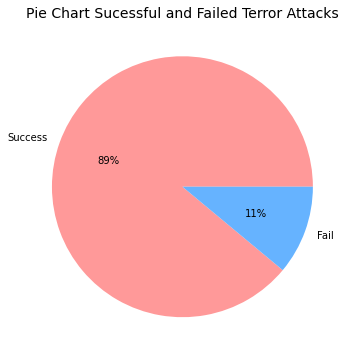

In [345]:
# The distribution of weapon types in successful and failed attacks are similar.
# Now let us check the proportion of successful and failed attacks using a pie chart.

plt.figure(figsize=(10,6))

pie_data = terrorism_df["Success"].value_counts()
labels = ["Success", "Fail"]
colors = ['#ff9999','#66b3ff']
plt.pie(x=pie_data.values, labels=labels, colors=colors, autopct="%.0f%%")
plt.title("Pie Chart of Sucessful and Failed Terror Attacks", fontsize=14)
plt.show()


In [ ]:
# 89% of total attacks have been succesful. 
# The weapons used are mostly Explosives and Firearms. These weapons can be considered to be highly lethal as they have contributed
# to most successful terror attacks.

# Frame policies for manufacture of explosives and licensing of firearms.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

In [278]:
terrorism_df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type', 'Duration', 'Success', 'Criterion_1', 'Criterion_2',
       'Criterion_3', 'Property_damage', 'Suicide_attack'],
      dtype='object')

In [ ]:
# Let us now explore the most common terror gangs.

terrorism_df.Gang_name.nunique()

In [ ]:
# Since there are more than 3500 gangs, let us calculate the cumulative attacks by top n gangs and analyze only those.


In [307]:
# Preare the data for visualization
gang_df = terrorism_df["Gang_name"].value_counts()
gang_df = pd.DataFrame(gang_df)
gang_df.reset_index(inplace = True)
gang_df.rename(columns={'index':'Gang_name', 'Gang_name':'Number_of_attacks'}, inplace=True)

total_gang_attacks = gang_df['Number_of_attacks'].sum()
gang_df['Attack_%'] = (gang_df['Number_of_attacks'] / total_gang_attacks) * 100
gang_df['Cumulative_num_attacks'] = gang_df['Number_of_attacks'].cumsum()
gang_df['Cum_attack_%'] = (gang_df['Cumulative_num_attacks'] / total_gang_attacks) * 100
gang_df.head(10)

,Gang_name,Number_of_attacks,Attack_%,Cumulative_num_attacks,Cum_attack_%
0,Unknown,82782,45.561971,82782,45.561971
1,Taliban,7478,4.115779,90260,49.677750
2,Islamic State of Iraq and the Levant (ISIL),5613,3.089311,95873,52.767061
3,Shining Path (SL),4555,2.507004,100428,55.274064
4,Farabundo Marti National Liberation Front (FMLN),3351,1.844340,103779,57.118404
5,Al-Shabaab,3288,1.809666,107067,58.928070
6,New People's Army (NPA),2772,1.525667,109839,60.453737
7,Irish Republican Army (IRA),2671,1.470078,112510,61.923816
8,Revolutionary Armed Forces of Colombia (FARC),2487,1.368807,114997,63.292623
9,Boko Haram,2418,1.330831,117415,64.623454


In [327]:
# From the above data, we see that 45% of attacks are by unknown gangs. This is not a very useful piece of data.
# Amongst the remaining only Taliban, ISIL and SL comprise of more than 2% attacks. 
#

# We can plot the data with a condition of attacks > 1%. There are 13 gangs in this case.
gang_plot_df = gang_df[gang_df["Attack_%"]>1]
gang_plot_df

# Since the gang names are too long, let us rename some gang names.
gang_plot_df.replace({'Islamic State of Iraq and the Levant (ISIL)':'ISIL','Shining Path (SL)':'SL',
                    'Farabundo Marti National Liberation Front (FMLN)':'FMLN','New People\'s Army (NPA)':'NPA',
                    'Irish Republican Army (IRA)':'IRA', 'Revolutionary Armed Forces of Colombia (FARC)':'FARC',
                    'Kurdistan Workers\' Party (PKK)':'PKK', 'Basque Fatherland and Freedom (ETA)':'ETA',
                     'Communist Party of India - Maoist (CPI-Maoist)':'CPI-Maoist'}, inplace=True)

gang_plot_df



C:\Users\aimee\AppData\Local\Temp/ipykernel_25572/4003048589.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gang_plot_df.replace({'Islamic State of Iraq and the Levant (ISIL)':'ISIL','Shining Path (SL)':'SL',


,Gang_name,Number_of_attacks,Attack_%,Cumulative_num_attacks,Cum_attack_%
0,Unknown,82782,45.561971,82782,45.561971
1,Taliban,7478,4.115779,90260,49.677750
2,ISIL,5613,3.089311,95873,52.767061
3,SL,4555,2.507004,100428,55.274064
4,FMLN,3351,1.844340,103779,57.118404
5,Al-Shabaab,3288,1.809666,107067,58.928070
6,NPA,2772,1.525667,109839,60.453737
7,IRA,2671,1.470078,112510,61.923816
8,FARC,2487,1.368807,114997,63.292623
9,Boko Haram,2418,1.330831,117415,64.623454


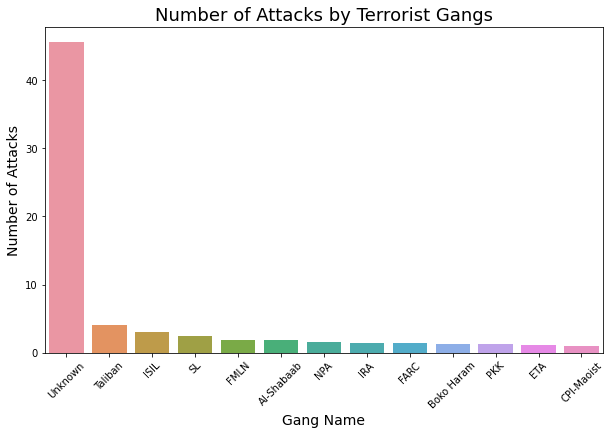

In [330]:
plt.figure(figsize=(10,6))

sns.barplot(x="Gang_name", y="Attack_%", data=gang_plot_df)
plt.title("Number of Attacks by Terrorist Gangs", fontsize=18)
plt.xlabel("Gang Name", fontsize=14)
plt.ylabel("Number of Attacks", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Excluding "Unknown" (since we do not have this data), the remaining 12 gangs have been responsible for more than 1% of 
# global terrorist attacks and the same should be highlighted to the anti-terror organizations.

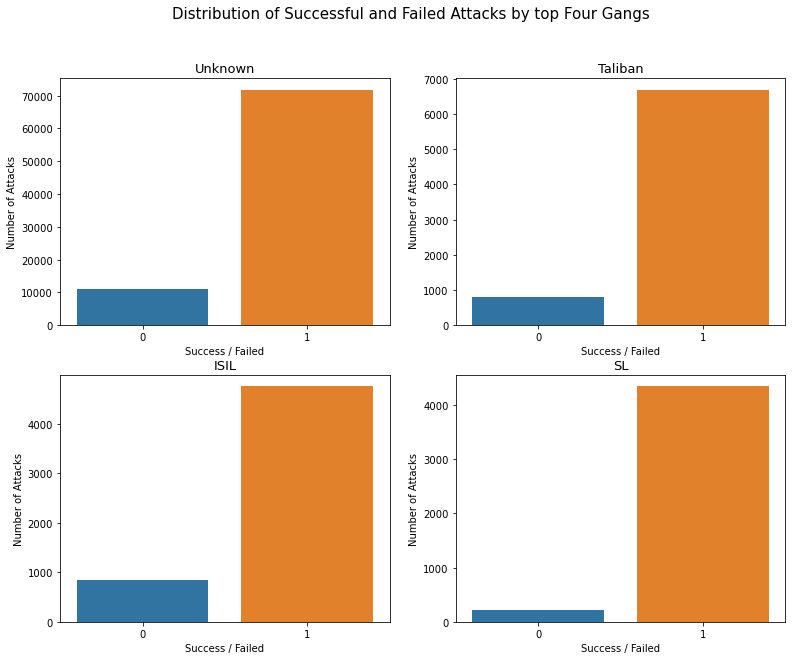

In [365]:
# We can also explore whether the attacks by unknown gangs have been successful or not.

# Prepare data with only "Unknown", "Taliban", "ISIL" and "SL" gangs which have done more than 2% attacks to get an understanding
# of which gangs have had the most successful and failed attacks.

# Prepare Data
# Unknown Gang
unknown_gname_attacks = terrorism_df[terrorism_df["Gang_name"]=="Unknown"]
unknown_gname_attacks = unknown_gname_attacks[["Gang_name", "Success"]]

# Taliban
taliban_attacks = terrorism_df[terrorism_df["Gang_name"]=="Taliban"]
taliban_attacks = taliban_attacks[["Gang_name", "Success"]]

# ISIL
isil_attacks = terrorism_df[terrorism_df["Gang_name"]=="Islamic State of Iraq and the Levant (ISIL)"]
isil_attacks = isil_attacks[["Gang_name", "Success"]]

# SL
sl_attacks = terrorism_df[terrorism_df["Gang_name"]=="Shining Path (SL)"]
sl_attacks = sl_attacks[["Gang_name", "Success"]]

# Plot data
plt.figure(figsize=(13,10))
plt.suptitle("Distribution of Successful and Failed Attacks by top Four Gangs", fontsize=15)

# Subplot1: Unknown
plt.subplot(2,2,1)
sns.countplot(x="Success", data=unknown_gname_attacks)
plt.title("Unknown", fontsize=13)
plt.xlabel("Success / Failed", fontsize=10)
plt.ylabel("Number of Attacks", fontsize=10)

# Subplot2: Taliban
plt.subplot(2,2,2)
sns.countplot(x="Success", data=taliban_attacks)
plt.title("Taliban", fontsize=13)
plt.xlabel("Success / Failed", fontsize=10)
plt.ylabel("Number of Attacks", fontsize=10)

# Subplot3: ISIL
plt.subplot(2,2,3)
sns.countplot(x="Success", data=isil_attacks)
plt.title("ISIL", fontsize=13)
plt.xlabel("Success / Failed", fontsize=10)
plt.ylabel("Number of Attacks", fontsize=10)

# Subplot4: SL
plt.subplot(2,2,4)
sns.countplot(x="Success", data=sl_attacks)
plt.title("SL", fontsize=13)
plt.xlabel("Success / Failed", fontsize=10)
plt.ylabel("Number of Attacks", fontsize=10)

plt.show()

In [ ]:
# We can observe from the above visualization that as ISIL has had more failed attacks as a proportion of its individual total attacks as compared to other gangs.
# Since we do not have the data on unknown gangs, we can rank the other 3 gangs in the order as Taliban, SL, ISIL with Taliban being the most dangerous.


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

In [ ]:
# Let us now visualize the attack types, their success ratios and corresponding target types.
# First, lets check distribution of attack types

In [366]:
terrorism_df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type', 'Duration', 'Success', 'Criterion_1', 'Criterion_2',
       'Criterion_3', 'Property_damage', 'Suicide_attack'],
      dtype='object')

In [367]:
terrorism_df.Attack_type.value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64

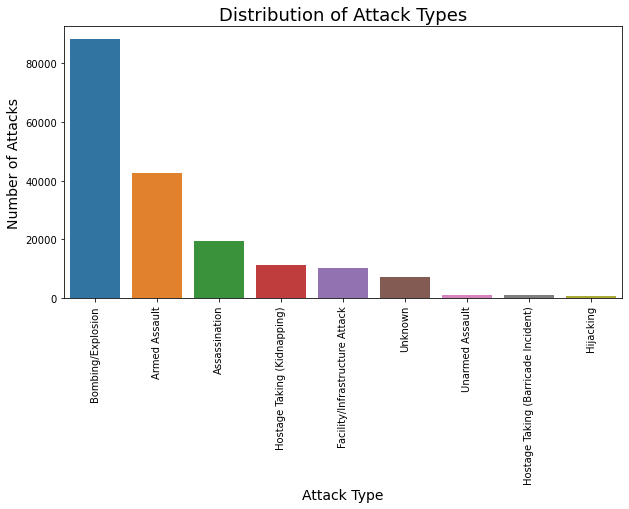

In [379]:
plt.figure(figsize=(10,5))
sns.countplot(x="Attack_type", data=terrorism_df, order=terrorism_df["Attack_type"].value_counts().index)
plt.title("Distribution of Attack Types", fontsize=18)
plt.xlabel("Attack Type", fontsize=14)
plt.ylabel("Number of Attacks", fontsize=14)
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Inference
# We can see that Bombing/Explosion is the most common attack type followed by Armed Assault and Assasination .
# This makes sense since the most common weapon used are Explosives (which are used in Bombing/Explosion) and Firearms (which are used in Armed Assault and Assasination)
# This data helps to corroborate the observations of weapons data.

In [437]:
# We can also explore how many of these attacks were suicide attacks.
terrorism_df.Suicide_attack.value_counts()

0    175058
1      6633
Name: Suicide_attack, dtype: int64

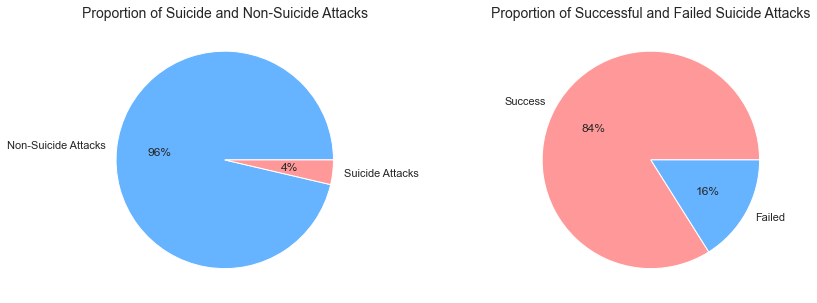

In [468]:
plt.figure(figsize=(14,5))

# Subplot1:  
plt.subplot(1,2,1)
sui_nosui_attacks = terrorism_df["Suicide_attack"].value_counts()
labels = ["Non-Suicide Attacks", "Suicide Attacks"]
colors = ['#66b3ff', '#ff9999']
plt.pie(x=suicide_attacks.values, labels=labels, colors=colors, autopct="%.0f%%")
plt.title("Proportion of Suicide and Non-Suicide Attacks", fontsize=14)

plt.subplot(1,2,2)
suicide = terrorism_df[terrorism_df["Suicide_attack"]==1]
suicide_success = suicide["Success"].value_counts()
colors = ['#ff9999', '#66b3ff']
labels = ["Success", "Failed"]
plt.pie(x=suicide_success.values, labels=labels, colors=colors, autopct="%.0f%%")
plt.title("Proportion of Successful and Failed Suicide Attacks", fontsize=14)
plt.show()

# Inference:
# 4% of total attacks are Suicide attacks
# 84% of the total Suicide attacks have been successful. 

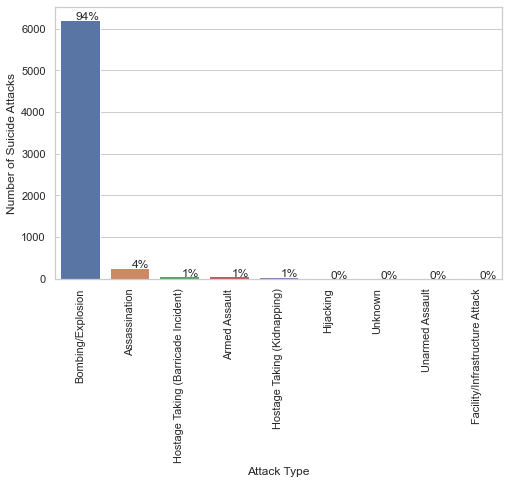

In [467]:
suicide = terrorism_df[terrorism_df["Suicide_attack"]==1]

plt.figure(figsize=(8,5))

suicide_plot = sns.countplot(x="Attack_type", data=suicide, order=suicide["Attack_type"].value_counts().index)
plt.xlabel("Attack Type")
plt.ylabel("Number of Suicide Attacks")
plt.xticks(rotation=90)
patches_percentage(suicide, suicide_plot)

plt.show()

# Almost all of suicide attacks (94%) have been done using Bombing/Explosion as attack mode.

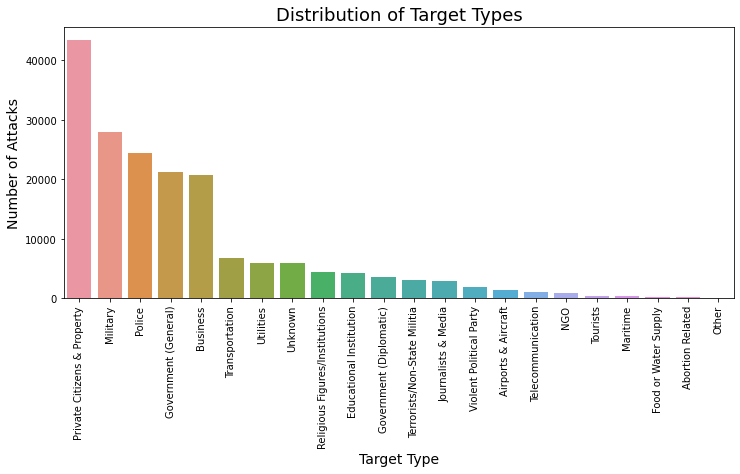

In [381]:
# Now let us check the distribution of targets.

plt.figure(figsize=(12,5))
sns.countplot(x="Target_type", data=terrorism_df, order=terrorism_df["Target_type"].value_counts().index)
plt.title("Distribution of Target Types", fontsize=18)
plt.xlabel("Target Type", fontsize=14)
plt.ylabel("Number of Attacks", fontsize=14)
plt.xticks(rotation=90)

plt.show()

In [387]:
# We can observe from the above chart that the top 5 target types constitute majority of the attacks.
# Let us calculate the proportion of the top 5 targets

top5_targets = ["Private Citizens & Property", "Military", "Police", "Government (General)", "Business"]
top5_target_df = terrorism_df[terrorism_df["Target_type"].isin(top5_targets)]
top5_target_df.shape

top5_target_percent = (len(top5_target_df) / len(terrorism_df)) * 100
print(f"Proportion of top 5 Target types: {top5_target_percent:.2f}%")

# About 76% of total attacks have been done on these top 5 targets. Let us continue our analysis focussing on these top 5 targets.

Proportion of top 5 Target types: 75.93%


In [484]:
top5_target_df["Duration"].value_counts()

0    131549
1      6404
Name: Duration, dtype: int64

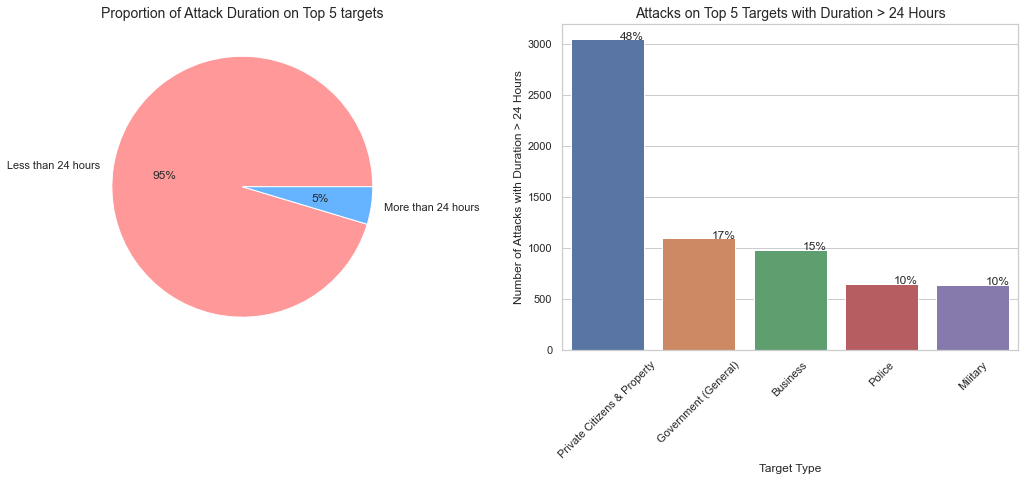

In [486]:
# Create a stacked bar chart to see the duration of attack on each of the top 5 targets.
# Duration 1 = The duration of an incident extended more than 24 hours. 
# Duration 2 = The duration of an incident extended less than 24 hours.
top5_target_dur1 = top5_target_df[top5_target_df["Duration"]==1]
top5_target_dur0 = top5_target_df[top5_target_df["Duration"]==0]
top5_target_df["Duration"].value_counts()

# Display proportion of extended duration for top 5 targets
plt.figure(figsize=(18,6))

# Subplot1: Duration of Attacks on top 5 targets
plt.subplot(1,2,1)
colors = ['#ff9999', '#66b3ff']
labels = ["Less than 24 hours", "More than 24 hours"]
duration = top5_target_df["Duration"].value_counts()
plt.pie(x=duration.values, labels=labels, colors=colors, autopct="%.0f%%")
plt.title("Proportion of Attack Duration on Top 5 targets", fontsize=14)

# Subplot2: Targets on whom attacks lasted for more than 24 hours
plt.subplot(1,2,2)
dur1 = top5_target_df[top5_target_df["Duration"]==1]
dur1_plot = sns.countplot(x="Target_type", data=dur1, order=dur1["Target_type"].value_counts().index)
plt.title("Attacks on Top 5 Targets with Duration > 24 Hours", fontsize=14)
plt.xlabel("Target Type")
plt.ylabel("Number of Attacks with Duration > 24 Hours")
plt.xticks(rotation=45)
patches_percentage(dur1, dur1_plot)

plt.show()

# Inference: Only 5% of total attacks on top 5 targets lasted for more than 24 hours.
# However, the main target here was Private Citizens and Property (48%) followed by Government(17%) and Business (15%).
# Police and Military Attacks have the least proportion (10%) in terms of Duration > 24 hours. This could be possible as they are better equipped with required resources to handle terror attacks.

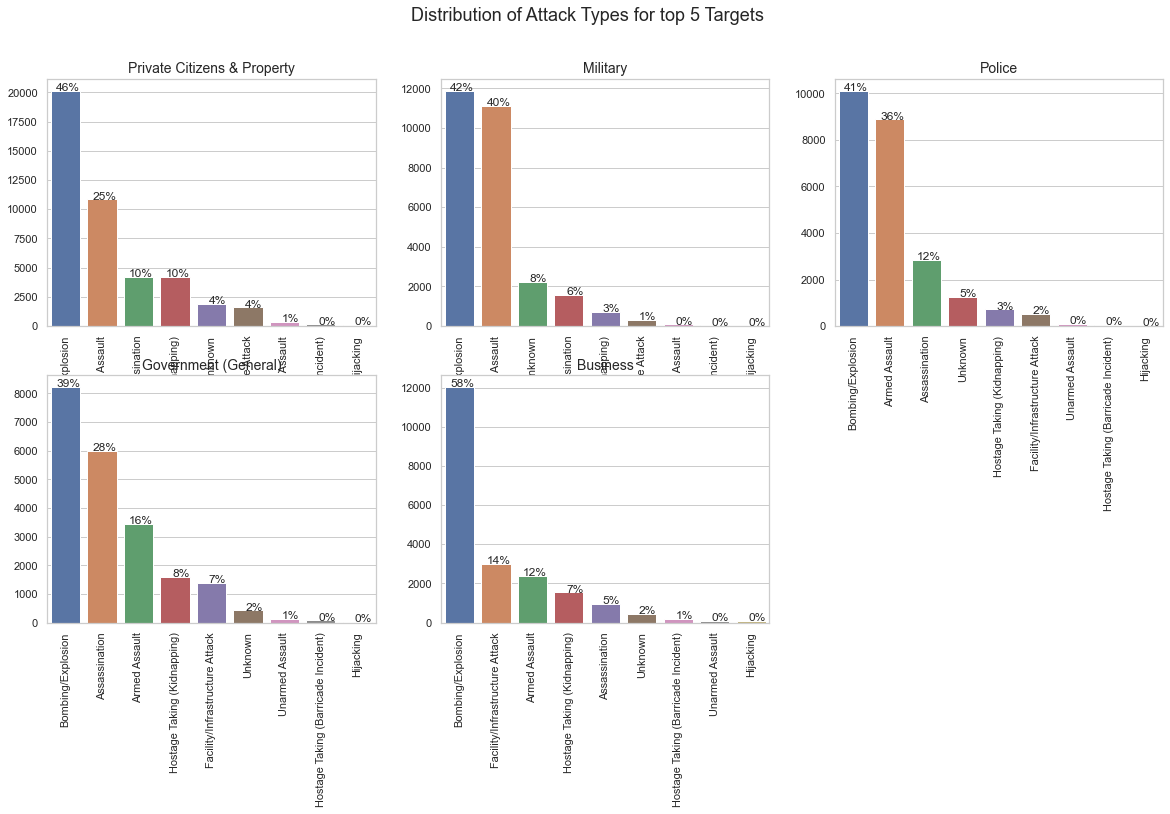

In [479]:
# Let us analyze attack types vs. target types
# Create subplots showing distribution of attack types for top 5 targets.

# Prepare data
pvt = top5_target_df[top5_target_df["Target_type"]=="Private Citizens & Property"]
military = top5_target_df[top5_target_df["Target_type"]=="Military"]
police = top5_target_df[top5_target_df["Target_type"]=="Police"]
govt = top5_target_df[top5_target_df["Target_type"]=="Government (General)"]
business = top5_target_df[top5_target_df["Target_type"]=="Business"]

# Define function to display percentage on top of each bar.
# total = float(len(business))
# # ax = sns.countplot(x="event", hue="event", data=train_df)
# # plt.title('Data provided for each event', fontsize=20)
# for p in bus_plot.patches:
#     percentage = '{:.0f}%'.format(100 * p.get_height()/total)
#     x = p.get_x() + p.get_width()
#     y = p.get_height()
#     bus_plot.annotate(percentage, (x, y),ha='right')
    
def patches_percentage(data, data_plot):
    total = float(len(data))
    for p in data_plot.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        bar_percent = data_plot.annotate(percentage, (x,y), ha='right')
    return bar_percent

# Plot data
sns.set(style="whitegrid")
fig = plt.figure(figsize=(20,10))
plt.suptitle("Distribution of Attack Types for top 5 Targets", fontsize=18)

# Subplot1: Private Citizens & Property
plt.subplot(2,3,1)
pvt_plot = sns.countplot(x="Attack_type", data=pvt, order=pvt["Attack_type"].value_counts().index)
plt.title("Private Citizens & Property", fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
patches_percentage(pvt,pvt_plot)

# Subplot2: Military
plt.subplot(2,3,2)
military_plot = sns.countplot(x="Attack_type", data=military, order=military["Attack_type"].value_counts().index)
plt.title("Military", fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
patches_percentage(military, military_plot)

# Subplot3: Police
plt.subplot(2,3,3)
police_plot = sns.countplot(x="Attack_type", data=police, order=police["Attack_type"].value_counts().index)
plt.title("Police", fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
patches_percentage(police, police_plot)

# Subplot4: Government (General)
plt.subplot(2,3,4)
govt_plot = sns.countplot(x="Attack_type", data=govt, order=govt["Attack_type"].value_counts().index)
plt.title("Government (General)", fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
patches_percentage(govt, govt_plot)

# Subplot5: Business
plt.subplot(2,3,5)
business_plot = sns.countplot(x="Attack_type", data=business, order=business["Attack_type"].value_counts().index)
plt.title("Business", fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
patches_percentage(business, business_plot)

plt.show()


In [ ]:
# Inferences
# 1. Private Citizens/Property: 71% of attacks are of Bombings/Explosions and Armed Assault with highest (46%) being Bombings/Explosions followed by Armed Assault(25%).
# 2. Military: 82% of attacks are of Bombings/Explosions and Armed Assault with both attack types being almost of equal occurrence.
# 3. Police: 77% of attacks are of Bombings/Explosions and Armed Assault with Bombings/Explosions (41%) being slightly higher than Armed Assault(36%).
# 4. Government: 83% of attacks are of Bombings/Explosions, Assasination and Armed Assault with Bombings/Explosions (39%) being highest, followed by Assasination (28%) and Armed Assault (16%).
# 5. Business: 84% of attacks are of Bombings/Explosions, Facility/Infrastructure Attack and Armed Assault with Bombings/Explosions being the highest (58%) followed by Facility Attack (14%) and Armed Assault (12%).

# We can observe that in all cases, Bombings/Explosions constitute the highest proportion of attack types and hence are of major concern.
# In military and police, however, Bombings/Explosions as well as Armed Assault are the most common attack types which also makes sense as these entities have access to such types of weapons too.
# In Government, apart from Bombings/Explosions, Assasinations are a major concern. Policies around proper protection and security of government officials should be considered based on such data.
# In Business, apart from Bombings/Explosions, Facility/Infrastucture Attacks and Armed Assault are common as the motive here could be to eliminate businessmen and their facilities by competitors.

In [368]:
terrorism_df.Target_type.value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [488]:
# Chart - 13 visualization code
terrorism_df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type', 'Duration', 'Success', 'Criterion_1', 'Criterion_2',
       'Criterion_3', 'Property_damage', 'Suicide_attack'],
      dtype='object')

In [500]:
# Let us explore the goal or intention of attacks in cases where the goal is known with certainty.
# This information is captured in variables "Criterion_1", "Criterion_2", "Criterion_3".

crit = terrorism_df[(terrorism_df["Criterion_1"]==1) | (terrorism_df["Criterion_2"]==1) | (terrorism_df["Criterion_3"]==1)]
crit.shape

# Since all rows are included in crit data frame, each attack satifies at least 1 criteria.
# Definition of each criteria/goal:
# Criterion_1 =  POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL
# Criterion_2 = INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S) 
# Criterion_3 = OUTSIDE INTERNATIONAL HUMANITARIAN LAW

# Let us also check whether an attack meets more than one criteria
crit_1 = terrorism_df[(terrorism_df["Criterion_1"]==1) & (terrorism_df["Criterion_2"]==1) & (terrorism_df["Criterion_3"]==1)]
print(f"Attacks done with all 3 Intentions: {len(crit_1)} ({(len(crit_1)/len(crit)*100):.2f}%)")

Attacks done with all 3 Intentions: 155762 (85.73%)


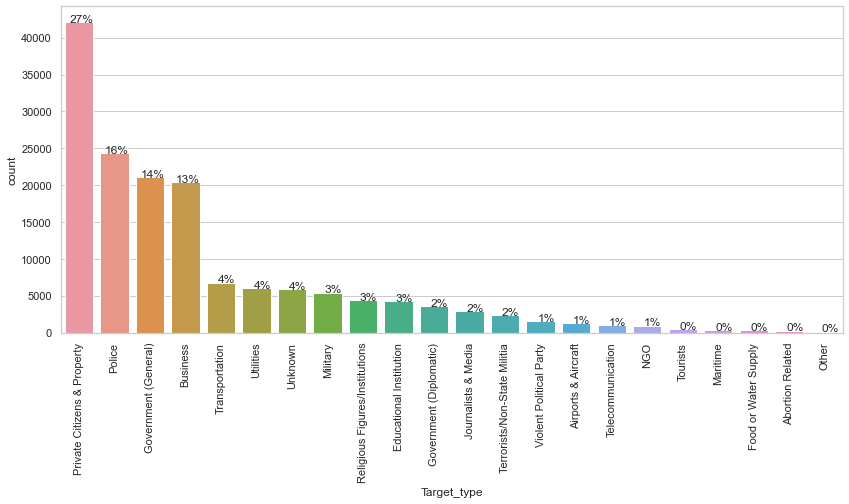

In [503]:
# We can see that 85% of total attacks were for all 3 purposes. Let us see which targets were affected by this.

plt.figure(figsize=(14,6))
crit_1_plot = sns.countplot(x="Target_type", data=crit_1, order=crit_1["Target_type"].value_counts().index)
plt.xticks(rotation=90)
patches_percentage(crit_1, crit_1_plot)

plt.show()

# Inference:
# We can see that Private Citizens & Property, Police, Government and Business have been attacked for reasons encompassing all the 3 criteria.

In [522]:
# We can also explore how each goal or criteria affected each of the top 5 targets.

crit1 = top5_target_df[top5_target_df["Criterion_1"]==1]
crit1 = crit1.groupby("Target_type")["Criterion_1"].count().reset_index()

crit2 = top5_target_df[top5_target_df["Criterion_2"]==1]
crit2 = crit2.groupby("Target_type")["Criterion_2"].count().reset_index()

crit3 = top5_target_df[top5_target_df["Criterion_3"]==1]
crit3 = crit3.groupby("Target_type")["Criterion_3"].count().reset_index()

# Merging all the 3 dataframes
crit_df = pd.merge(pd.merge(crit1, crit2, on="Target_type"), crit3, on="Target_type")
crit_df

,Target_type,Criterion_1,Criterion_2,Criterion_3
0,Business,20493,20608,20668
1,Government (General),21086,21248,21283
2,Military,27968,27980,5429
3,Police,24342,24502,24479
4,Private Citizens & Property,42298,43349,43511


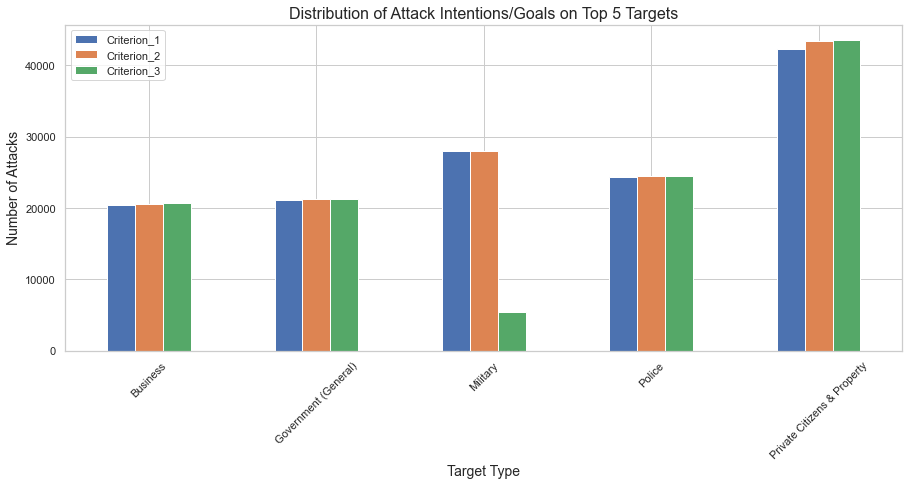

In [545]:
# Create a bar chart showing the distribution of attack intentions on top 5 targets.
plt.rcParams["figure.figsize"] =(15,6)

crit_df.plot(x="Target_type", y=["Criterion_1", "Criterion_2", "Criterion_3"], kind="bar")
plt.title("Distribution of Attack Intentions/Goals on Top 5 Targets", fontsize=16)
plt.xlabel("Target Type", fontsize=14)
plt.ylabel("Number of Attacks", fontsize=14)
plt.xticks(rotation=45)

plt.show()


In [546]:
# Inferences:
# We can observe that the goal of attacks on Business, Government, Police and Private Citizens & Property pertains to all the 3 criteria.
# However, attacks on Military are mainly for Criteria 1 and 2, i.e. Political, Economic, Religious or Social and Coercion, Intimidation and Publicity.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

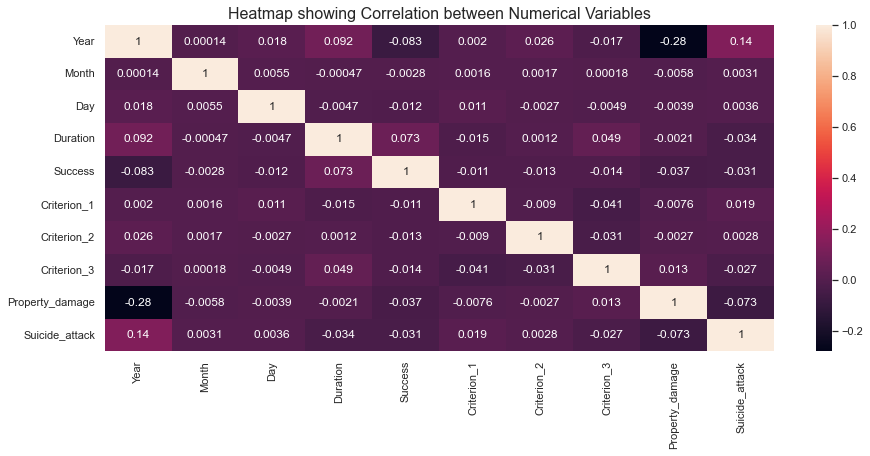

In [555]:
sns.heatmap(data=terrorism_df.corr(), cmap=None, annot=True)
plt.title("Heatmap showing Correlation between Numerical Variables", fontsize=16)

plt.show()

In [ ]:
# Correlation Heatmap is not a very useful Visualization for this dataset.
# As can be seen from the heatmap, there is no correlation between any of the numerical variables and this visualization does not provide any insights into the data.

In [548]:
terrorism_df.Property_damage.value_counts()

 1    93533
 0    66772
-9    21386
Name: Property_damage, dtype: int64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

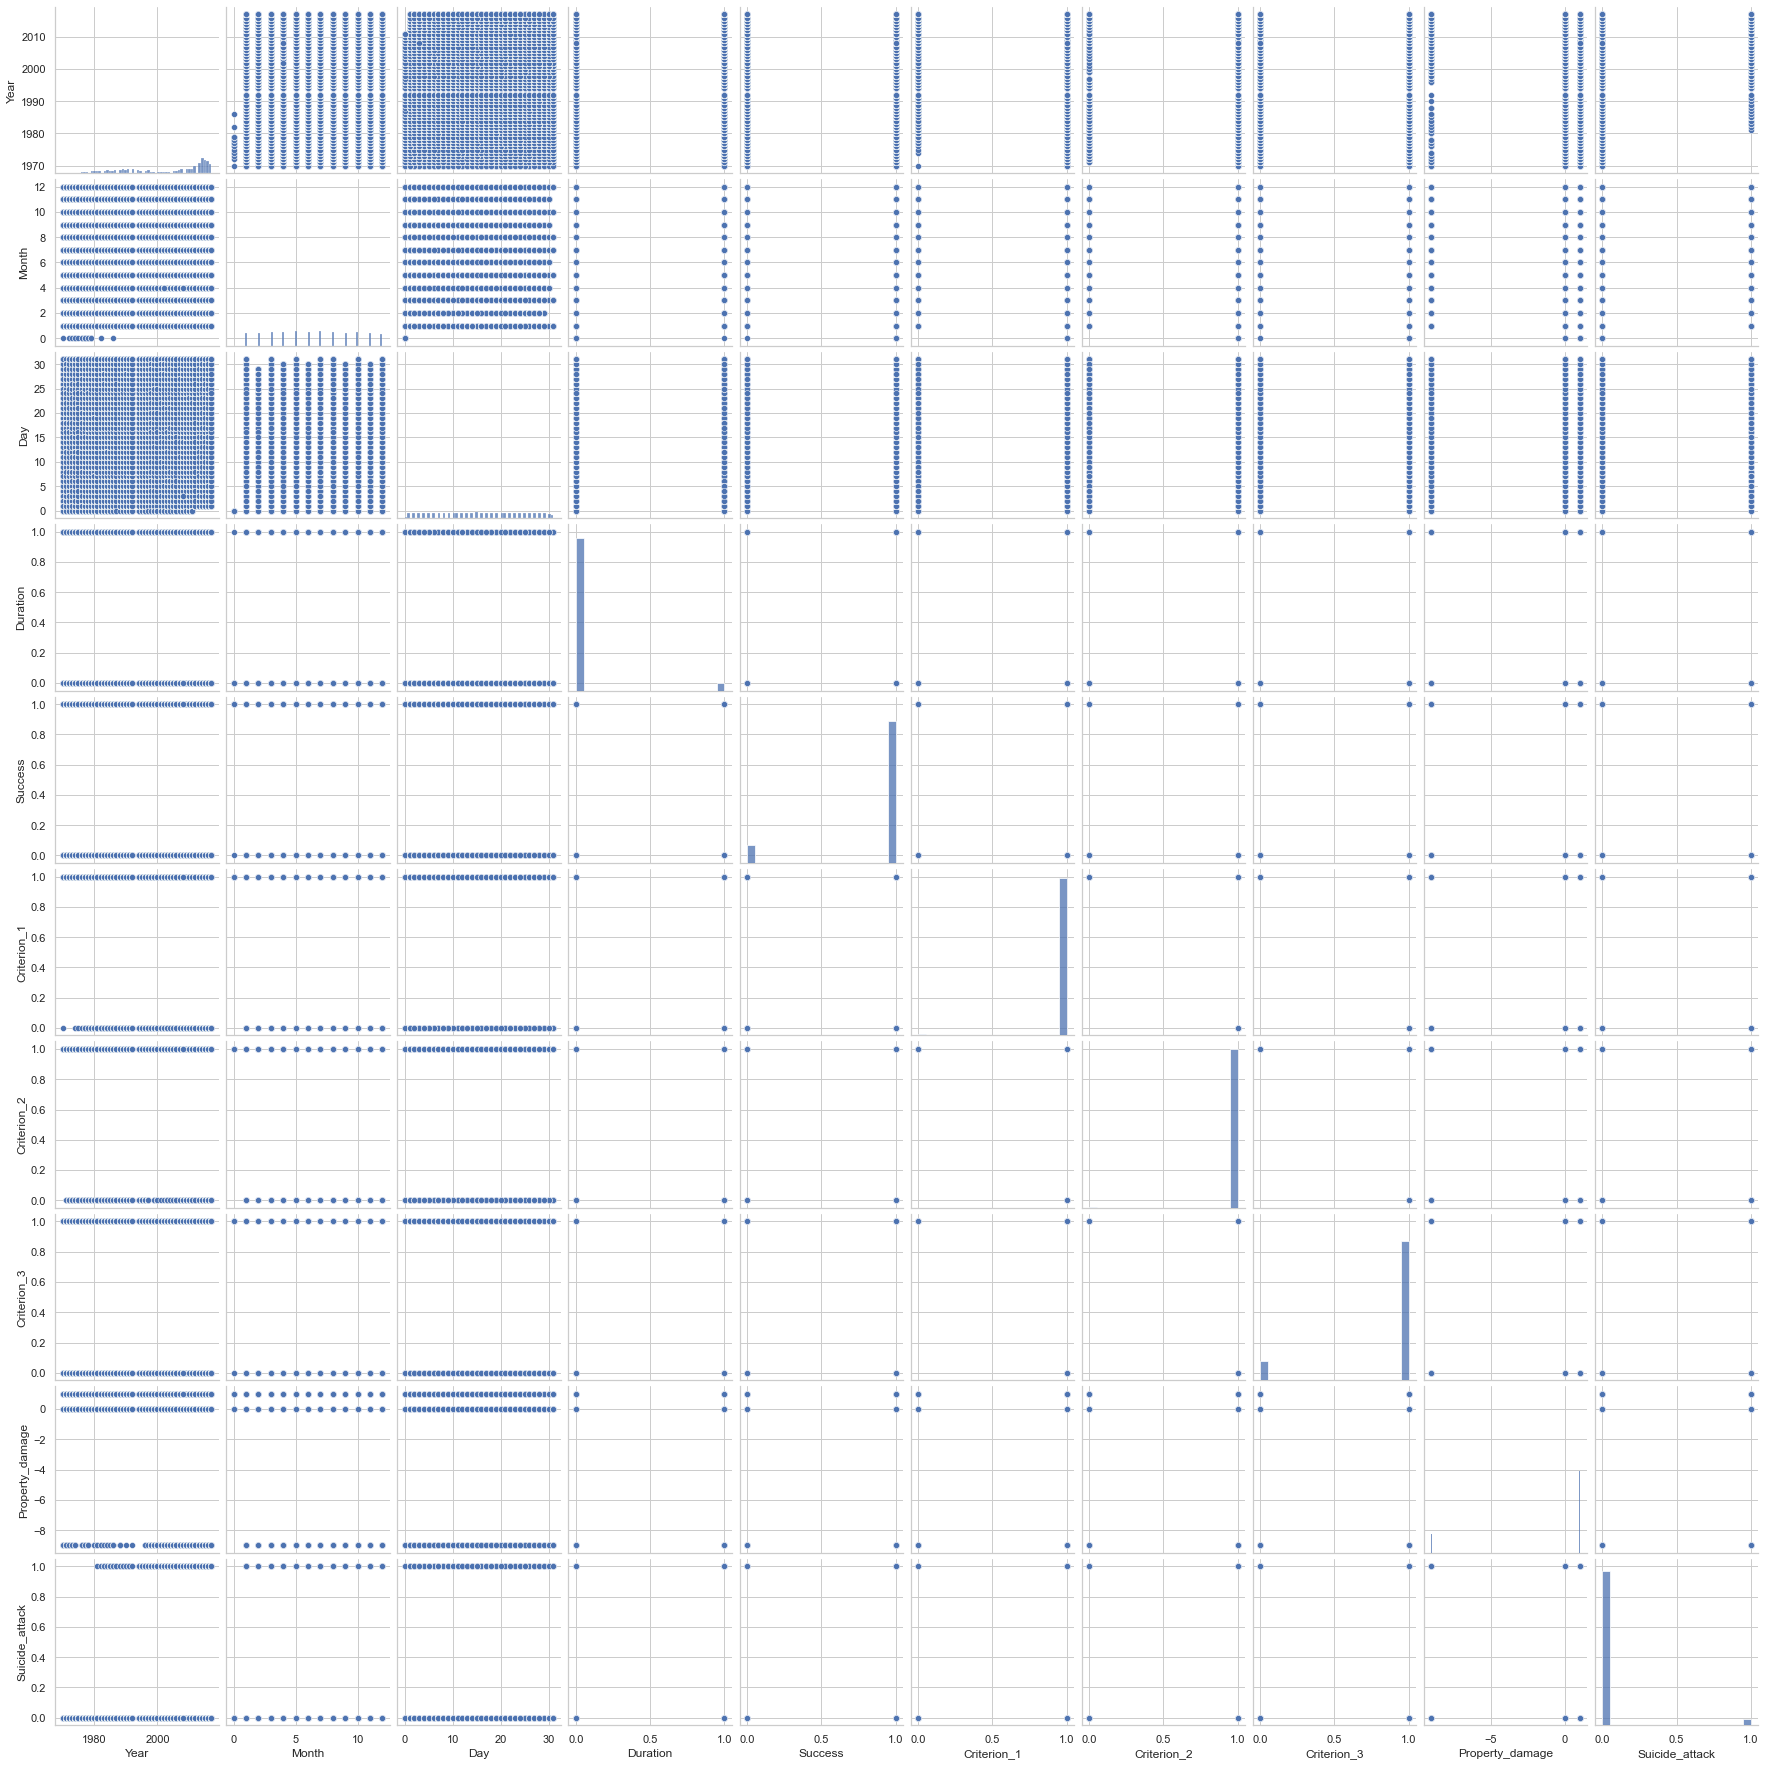

In [558]:
# Pair Plot visualization code

sns.pairplot(terrorism_df)

plt.show()

In [ ]:
# Just like the Heatmap, Pair Plot too is not a very effective visualization for this dataset.
# We cannot derive any meaningful insights from this visualization.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***